# Trabajo de Fin de Máster (TFM)
## **Título: Elecciones europeas 2024: análisis de datos de participación electoral y paridad de género.**
**Autor**: Antonio Sanz Maroto

**Tutores**: Santiago Mota y Carlos Ortega

**Universidad**: Universidad Nacional de Educación a Distancia (UNED)

**Máster de Big Data y Business Analytics 2023/2024**  
**Fecha**: Septiembre 2024























---

### Resumen
En este Trabajo de Fin de Máster se analizan las tasas de participación electoral y de paridad de género en las elecciones europeas desde 1979 hasta 2024, así como el análisis comparativo de los resultados electorales en España respecto a las últimas elecciones. Utilizando herramientas de análisis de datos como Python y R, se investigan las tendencias y las diferencias entre países en distintos periodos. Se han generado visualizaciones para ilustrar la evolución de la participación y la paridad de género identificando las tendencias, y hemiciclos con ggparliament para visulaizar la parte de resultados electorales.Todos los datos se han extraído de la página oficial [European Parliament](https://results.elections.europa.eu/en/tools/download-datasheets/)



# **1.Introducción**

El presente Trabajo de Fin de Máster (TFM) tiene como objetivo analizar la evolución de la participación electoral en las elecciones al Parlamento Europeo entre los años 1979 y 2024. Las elecciones al Parlamento Europeo representan un evento fundamental en el calendario político de la Unión Europea (UE), y la participación electoral en estas elecciones es un indicador clave de la implicación ciudadana en los asuntos europeos.

A lo largo de los últimos 40 años, la participación electoral en estas elecciones ha sufrido cambios significativos. En los primeros comicios, la participación fue relativamente alta, impulsada por el entusiasmo inicial de los votantes hacia el proyecto europeo. Sin embargo, en las décadas siguientes se ha observado una tendencia decreciente, lo que plantea preguntas importantes sobre el compromiso de los ciudadanos con la política de la UE y el creciente fenómeno de la desafección electoral.

Este estudio se centra en dos aspectos clave:

1. **Evolución temporal de la participación electoral**: Se analizarán las tendencias generales de la participación en cada país miembro de la UE a lo largo del tiempo. El análisis se centrará en identificar patrones en las tasas de participación, así como en destacar los países que presentan los niveles más altos y más bajos de participación.
   
2. **Comparación de la participación entre países**: Además del análisis temporal, se examinarán las diferencias en la participación electoral entre los distintos Estados miembros. Algunos países, como Bélgica y Luxemburgo, donde el voto es obligatorio, mantienen tasas de participación consistentemente altas. En otros, donde el voto es voluntario, las tasas de participación son considerablemente más bajas, especialmente en las elecciones más recientes.

El análisis se llevará a cabo utilizando datos de participación electoral proporcionados por fuentes oficiales de la Unión Europea, y se utilizarán herramientas de análisis de datos como Python y R para la visualización y el análisis de los resultados. Se emplearán gráficos como boxplots e histogramas para representar las tasas de participación en distintos años y países, facilitando la identificación de tendencias y variaciones importantes.
<div style="page-break-before: always;"></div>

In [ ]:
# @title
!pip install rpy2 > /dev/null 2>&1

In [ ]:
# @title
# Cargar la extensión de rpy2 en Jupyter/Colab
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# @title
%%R
# Instalar paquetes uno por uno
install.packages("httr",quiet=TRUE)
install.packages("readr",quiet=TRUE)
install.packages("tidyverse", quiet=TRUE)
install.packages("ggplot2", quiet=TRUE)
install.packages("leaflet", quiet=TRUE)
install.packages("reshape2", quiet=TRUE)
install.packages("gridExtra", quiet=TRUE)
install.packages("cowplot",quiet=TRUE)
suppressWarnings(suppressMessages({
  library(httr)
  library(readr)
  library(tidyverse)
  library(ggplot2)
  library(leaflet)
  library(reshape2)
  library(gridExtra)
  library(cowplot)
}))

In [ ]:
# @title
import rpy2.robjects as ro
!wget https://cran.r-project.org/src/contrib/Archive/ggparliament/ggparliament_2.0.0.tar.gz > /dev/null 2>&1
ro.r('suppressWarnings(suppressMessages(install.packages("ggparliament_2.0.0.tar.gz", repos = NULL, type = "source")))')
ro.r('suppressWarnings(suppressMessages(library(ggparliament)))')

'cowplot','gridExtra','reshape2',...,'datasets','methods','base'


In [ ]:
# @title
# Descargar los archivos con nombres únicos
!wget -O turnout_data.csv 'https://results.elections.europa.eu/data-sheets/csv/turnout/turnout-eu.csv' > /dev/null 2>&1
!wget -O turnout-country.csv 'https://results.elections.europa.eu/data-sheets/csv/turnout/turnout-country.csv' > /dev/null 2>&1
!wget -O groups.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/groups.csv' > /dev/null 2>&1
!wget -O parties.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/parties.csv' > /dev/null 2>&1
!wget -O results-parties-es.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/results-parties/results-parties-es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-groups-es.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/seats-breakdown-groups/es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-parties-es_2024.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/seats-breakdown-parties/es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-parties-es_2019.csv 'https://results.elections.europa.eu/data-sheets/csv/2019-2024/election-results/seats-breakdown-parties/es.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1979-1984.csv 'https://results.elections.europa.eu/data-sheets/csv/1979-1984/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1984-1989.csv 'https://results.elections.europa.eu/data-sheets/csv/1984-1989/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1989-1994.csv 'https://results.elections.europa.eu/data-sheets/csv/1989-1994/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1994-1999.csv 'https://results.elections.europa.eu/data-sheets/csv/1994-1999/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1999-2004.csv 'https://results.elections.europa.eu/data-sheets/csv/1999-2004/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2004-2009.csv 'https://results.elections.europa.eu/data-sheets/csv/2004-2009/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2009-2014.csv 'https://results.elections.europa.eu/data-sheets/csv/2009-2014/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2014-2019.csv 'https://results.elections.europa.eu/data-sheets/csv/2014-2019/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2019-2024.csv 'https://results.elections.europa.eu/data-sheets/csv/2019-2024/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2024-2029.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1

In [ ]:
# @title
#Para preparar el análisis posterior sobre la paridad de género de las listas
#de los países que conforman la Unión Europea, vamos a combinar los ficheros de
#las elecciones en un único dataframe, para facilitar los cálculos posteriores.
import pandas as pd
import re
files = [
    'gender-balance-country-1979-1984.csv',
    'gender-balance-country-1984-1989.csv',
    'gender-balance-country-1989-1994.csv',
    'gender-balance-country-1994-1999.csv',
    'gender-balance-country-1999-2004.csv',
    'gender-balance-country-2004-2009.csv',
    'gender-balance-country-2009-2014.csv',
    'gender-balance-country-2014-2019.csv',
    'gender-balance-country-2019-2024.csv',
    'gender-balance-country-2024-2029.csv',
]
dataframes = []
# Expresión regular para encontrar el primer año en el nombre del archivo
year_pattern = re.compile(r'(\d{4})-\d{4}')
# Procesar cada archivo
for filepath in files:
    try:
        filename = filepath.split('/')[-1]
        match = year_pattern.search(filename)
        if match:
            year = int(match.group(1))
            df = pd.read_csv(filepath, sep=';')
            df['Year'] = year
            dataframes.append(df)
        else:
            raise ValueError("No se pudo encontrar un año en el nombre del archivo.")
    except Exception as e:
        print(f"No se pudo procesar el archivo {filename}: {e}")
# Combinar todos los DataFrames en uno solo
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Mostrar la estructura del DataFrame combinado
    print(combined_df.info())
else:
    print("No se pudieron concatenar los DataFrames.")
# Mostrar las primeras filas del DataFrame combinado
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COUNTRY_ID     196 non-null    object 
 1   MEN            196 non-null    float64
 2   WOMEN          196 non-null    float64
 3   UPDATE_STATUS  196 non-null    object 
 4   UPDATE_TIME    27 non-null     object 
 5   Year           196 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 9.3+ KB
None


,COUNTRY_ID,MEN,WOMEN,UPDATE_STATUS,UPDATE_TIME,Year
0,BE,92.0,8.0,CONSTITUTIVE,NaN,1979
1,DK,69.0,31.0,CONSTITUTIVE,NaN,1979
2,DE,85.0,15.0,CONSTITUTIVE,NaN,1979
3,IE,87.0,13.0,CONSTITUTIVE,NaN,1979
4,FR,78.0,22.0,CONSTITUTIVE,NaN,1979


In [ ]:
# @title
%%R
# Leer los archivos CSV con nombres únicos
turnout_country <- read.csv('turnout-country.csv', sep = ";")
turnout_eu <- read.csv('turnout_data.csv', sep = ";")
groups <- read.csv('groups.csv', sep = ";")
parties <- read.csv('parties.csv', sep = ";")
results_parties_es <- read.csv('results-parties-es.csv', sep = ";")
seats_breakdown_groups_es <- read.csv('seats-breakdown-groups-es.csv', sep = ";")
seats_breakdown_parties_es_2024 <- read.csv('seats-breakdown-parties-es_2024.csv', sep = ";")
seats_breakdown_parties_es_2019 <- read.csv('seats-breakdown-parties-es_2019.csv', sep = ";")

In [ ]:
# @title
%%R
# Filtrar solo los años de elecciones europeas
valid_years <- c(1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024)
turnout_filtered <- turnout_country %>%
  filter(YEAR %in% valid_years)
# Agrupar por año y calcular la media y desviación estándar de la tasa de participación con dos decimales
turnout_summary_filtered <- turnout_filtered %>%
  group_by(YEAR) %>%
  summarise(
    mean_rate = round(mean(RATE, na.rm = TRUE), 2),
    sd_rate = round(sd(RATE, na.rm = TRUE), 2)
  )
# Mostrar el resumen
print(turnout_summary_filtered)

# A tibble: 10 × 3
    YEAR mean_rate sd_rate
   <int>     <dbl>   <dbl>
 1  1979      66.0    19.7
 2  1984      64.1    20.2
 3  1989      62.9    18.2
 4  1994      58.5    19.5
 5  1999      52.4    20.2
 6  2004      47.8    20.4
 7  2009      46.2    19.0
 8  2014      43.3    18.4
 9  2019      48.8    16.6
10  2024      48.8    15.8


Saving 6.67 x 6.67 in image


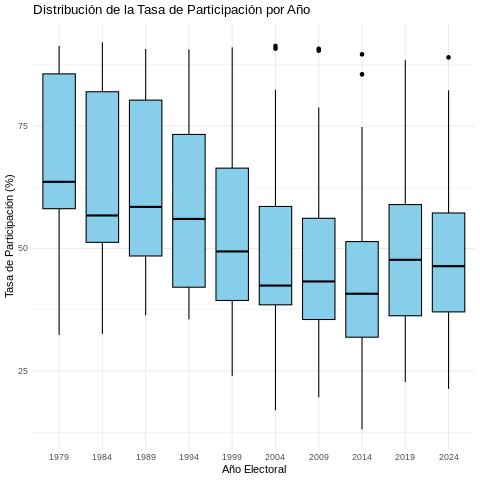

In [ ]:
# @title
%%R
# Crear un gráfico de bigotes (boxplot) para visualizar la distribución de la tasa de participación por año
p <- ggplot(turnout_filtered, aes(x = as.factor(YEAR), y = RATE)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(
    title = "Distribución de la Tasa de Participación por Año",
    x = "Año Electoral",
    y = "Tasa de Participación (%)"
  ) +
  theme_minimal()
# Mostrar el gráfico
print(p)
# Guardar el gráfico como PNG
ggsave("boxplot_turnout.png", plot = p)

Saving 6.67 x 6.67 in image


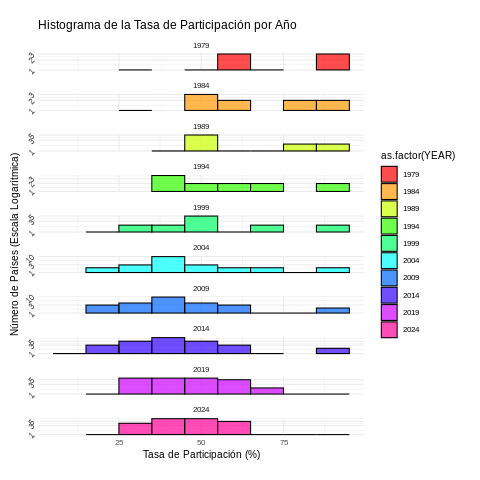

In [ ]:
# @title
%%R
p<-ggplot(turnout_filtered, aes(x = RATE, fill = as.factor(YEAR))) +
  geom_histogram(binwidth = 10, color = "black", alpha = 0.7) +
  facet_wrap(~ YEAR, ncol = 1, scales = "free_y") +
  scale_fill_manual(values = rainbow(length(unique(turnout_filtered$YEAR)))) +
  scale_y_log10() +
  labs(
    title = "Histograma de la Tasa de Participación por Año",
    x = "Tasa de Participación (%)",
    y = "Número de Países (Escala Logarítmica)"
  ) +
  theme_minimal() +
  theme(
    text = element_text(size = 10),
    axis.text.y = element_text(size = 8, hjust = 1, angle = 45),
    plot.margin = margin(20, 20, 20, 10)
  ) +
  theme(panel.spacing.y = unit(0.5, "lines"))
ggsave("histograma_turnout.png", plot = p)
print(p)

Saving 6.67 x 6.67 in image


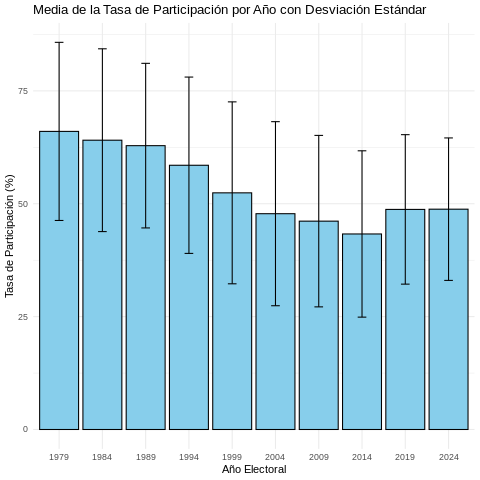

In [ ]:
# @title
%%R
# Crear un gráfico de barras con error bars usando la media y desviación estándar
p <- ggplot(turnout_summary_filtered, aes(x = as.factor(YEAR), y = mean_rate)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_errorbar(aes(ymin = mean_rate - sd_rate, ymax = mean_rate + sd_rate), width = 0.2) +
  labs(
    title = "Media de la Tasa de Participación por Año con Desviación Estándar",
    x = "Año Electoral",
    y = "Tasa de Participación (%)"
  ) +
  theme_minimal()
# Mostrar el gráfico
print(p)
# Guardar el gráfico como PNG
ggsave("barplot_turnout.png", plot = p)


In [ ]:
# @title
%%R
# Identificar el año con la máxima y mínima participación electoral
max_participation <- turnout_summary_filtered %>% filter(mean_rate == max(mean_rate))
min_participation <- turnout_summary_filtered %>% filter(mean_rate == min(mean_rate))

# Mostrar los resultados
print(paste("Máxima participación:", max_participation$mean_rate, "en el año", max_participation$YEAR))
print(paste("Mínima participación:", min_participation$mean_rate, "en el año", min_participation$YEAR))

[1] "Máxima participación: 66.03 en el año 1979"
[1] "Mínima participación: 43.31 en el año 2014"


In [ ]:
# @title
import os  # Importar el módulo os para manejar los directorios
import requests  # Importar requests para descargar las banderas
import pandas as pd  # Importar pandas para manejar el DataFrame
# Lista de países y sus códigos
countries = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "CY": "Cyprus",
    "EE": "Estonia",
    "FI": "Finland",
    "FR": "France",
    "GR": "Greece",
    "HR": "Croatia",
    "HU": "Hungary",
    "IT": "Italy",
    "IE": "Ireland",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "MT": "Malta",
    "NL": "Netherlands",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "ES": "Spain",
    "SE": "Sweden",
}
# Base URL para descargar las banderas en formato PNG, 40x30 píxeles
base_url = "https://flagcdn.com/w40/"
# Carpeta donde guardar las banderas
output_folder = "flags/"
# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Lista para almacenar la información del DataFrame
data = []
# Descargar las banderas
for code, country in countries.items():
    url = f"{base_url}{code.lower()}.png"
    response = requests.get(url)
    if response.status_code == 200:
        file_path = f"{output_folder}{code.lower()}.png"
        with open(file_path, "wb") as f:
            f.write(response.content)
        # Añadir la información al DataFrame
        data.append({
            "COUNTRY_ID": code,
            "Country_Name": country,
            "Flag_Image": file_path
        })
    else:
        print(f"No se pudo descargar la bandera de {country}.")
# Crear el DataFrame con la información de los países y las banderas
country_info = pd.DataFrame(data)

Saving 6.67 x 6.67 in image


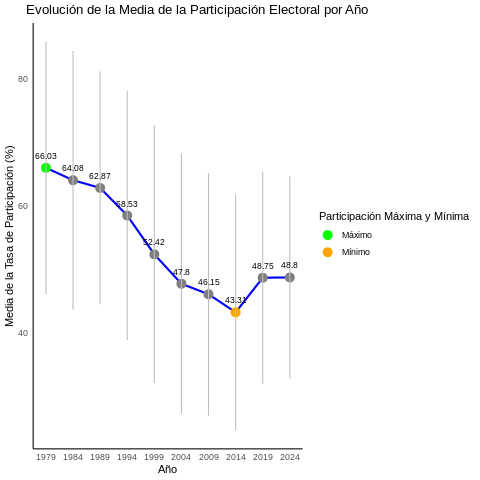

In [ ]:
# @title
%%R
# Crear la columna PointType para identificar máximo, mínimo o ninguno
turnout_summary_filtered <- turnout_summary_filtered %>%
  mutate(PointType = case_when(
    mean_rate == max(mean_rate) ~ "Máximo",
    mean_rate == min(mean_rate) ~ "Mínimo",
    TRUE ~ "Ninguno"
  ))

# Crear el gráfico con la leyenda para máximo y mínimo
p <- ggplot(turnout_summary_filtered, aes(x = YEAR, y = mean_rate)) +
  geom_line(color = "blue", size = 1) +
  geom_point(aes(color = PointType), size = 4) +
  geom_errorbar(aes(ymin = mean_rate - sd_rate, ymax = mean_rate + sd_rate), width = 0.2, color = "gray") +
  geom_text(aes(label = round(mean_rate, 2)), vjust = -1.5, size = 3, color = "black") +
  scale_x_continuous(breaks = turnout_summary_filtered$YEAR) +
  scale_color_manual(values = c("Máximo" = "green", "Mínimo" = "orange"), drop = TRUE) +
  labs(title = "Evolución de la Media de la Participación Electoral por Año",
       x = "Año",
       y = "Media de la Tasa de Participación (%)",
       color = "Participación Máxima y Mínima") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", color = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.1))

# Guardar el gráfico
ggsave("evolucion_turnout.png", plot = p)
print(p)


In [ ]:
# @title
import pandas as pd
# Leer el archivo turnout-country.csv
turnout_df = pd.read_csv("turnout-country.csv", sep=";")
# Filtrar para el año 2024
turnout_2024 = turnout_df[turnout_df['YEAR'] == 2024]
# Calcular la participación media de la UE y redondearla a dos decimales
participacion_media_ue = round(turnout_2024['RATE'].mean(), 2)
# Crear un DataFrame para la participación media de la UE
ue_row = pd.DataFrame({
    'COUNTRY_ID': ['UE'],
    'RATE': [participacion_media_ue],
    'YEAR': [2024],
    'UPDATE_STATUS': ['FINAL'],
    'UPDATE_TIME': ['']
})
# Añadir la participación media de la UE al DataFrame original
turnout_2024 = pd.concat([turnout_2024, ue_row], ignore_index=True)

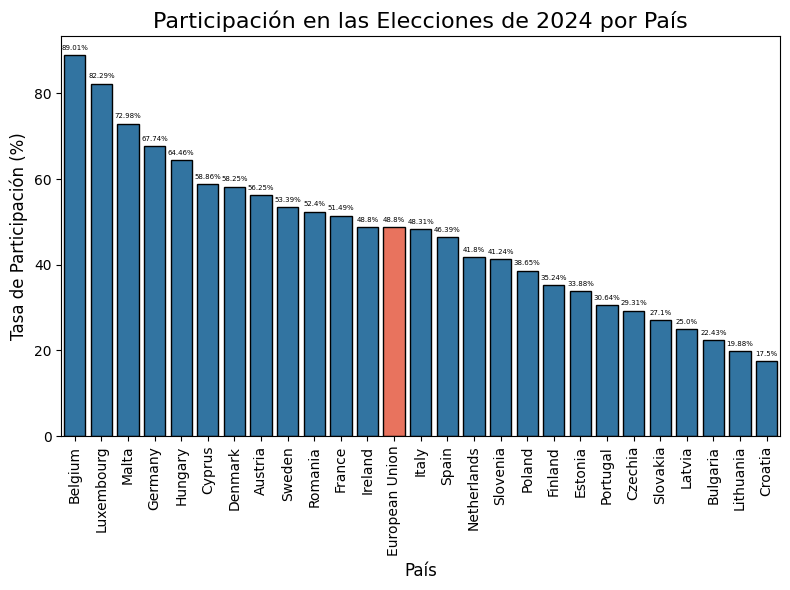

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
turnout_2024 = pd.DataFrame({
    'Country_Name': [
        'Belgium', 'Luxembourg', 'Malta', 'Germany', 'Hungary', 'Cyprus', 'Denmark', 'Austria', 'Sweden',
        'Romania', 'France', 'Ireland', 'European Union', 'Italy', 'Spain', 'Netherlands', 'Slovenia',
        'Poland', 'Finland', 'Estonia', 'Portugal', 'Czechia', 'Slovakia', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia'
    ],
    'RATE': [
        89.01, 82.29, 72.98, 67.74, 64.46, 58.86, 58.25, 56.25, 53.39, 52.4, 51.49, 48.8, 48.8,
        48.31, 46.39, 41.8, 41.24, 38.65, 35.24, 33.88, 30.64, 29.31, 27.1, 25.0, 22.43, 19.88, 17.5
    ]
})
turnout_2024['Color'] = ['#FF6347' if country == 'European Union' else '#1f77b4' for country in turnout_2024['Country_Name']]
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x='Country_Name',
    y='RATE',
    data=turnout_2024,
    palette=turnout_2024['Color'].tolist(),
    edgecolor='black'
)
for i, row in enumerate(turnout_2024.itertuples()):
    height = row.RATE
    barplot.text(i, height + 1, f"{height}%", ha="center", va='bottom', size=5, color="black")
plt.title('Participación en las Elecciones de 2024 por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Tasa de Participación (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('participacion_2024.png')
plt.show()

In [ ]:
# @title
# Calcular el índice de paridad para hacer el análisis
df_2024 = combined_df[combined_df['Year'] == 2024].copy()
df_2024['Parity_Index'] = abs(df_2024['WOMEN'] - 50)  # Paridad perfecta sería 50%
print(df_2024.head())

    COUNTRY_ID    MEN  WOMEN UPDATE_STATUS       UPDATE_TIME  Year  \
169         BE  59.09  40.91  CONSTITUTIVE  2024-09-06 10:50  2024   
170         BG  76.47  23.53  CONSTITUTIVE  2024-09-06 10:50  2024   
171         CZ  61.90  38.10  CONSTITUTIVE  2024-09-06 10:50  2024   
172         DK  66.67  33.33  CONSTITUTIVE  2024-09-06 10:50  2024   
173         DE  62.50  36.46  CONSTITUTIVE  2024-09-06 10:50  2024   

     Parity_Index  
169          9.09  
170         26.47  
171         11.90  
172         16.67  
173         13.54  


El país con mayor desviación de la paridad es: Cyprus (50.0%)
El país con menor desviación de la paridad es: Spain (0.0%)


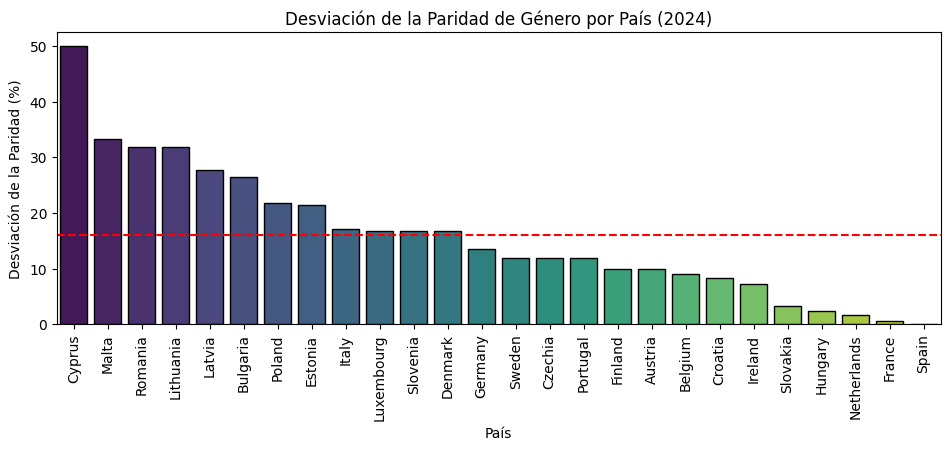

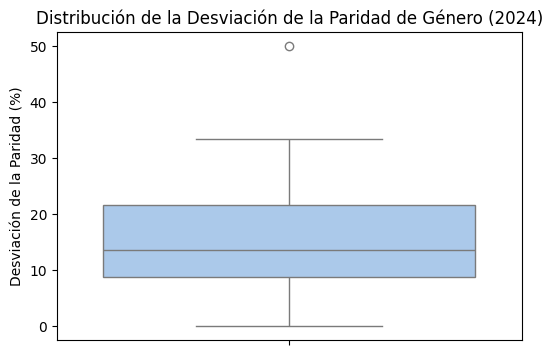

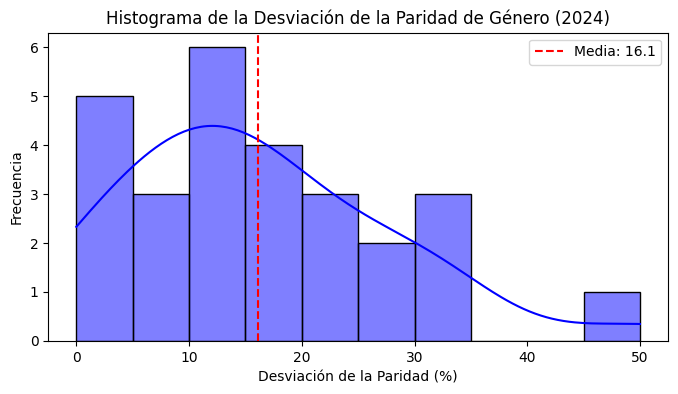

In [ ]:
# @title
df_2024.loc[:, 'Parity_Index'] = abs(df_2024['WOMEN'] - 50)
mean_parity = df_2024['Parity_Index'].mean()
std_parity = df_2024['Parity_Index'].std()
# Merge para obtener los nombres de los países
df_merged = df_2024.merge(country_info, on='COUNTRY_ID')
# Encuentra el país con la mayor desviación de la paridad
max_parity = df_merged.loc[df_merged['Parity_Index'].idxmax()]
# Encuentra el país con la menor desviación de la paridad
min_parity = df_merged.loc[df_merged['Parity_Index'].idxmin()]
# Imprime los resultados mostrando el nombre del país
print(f"El país con mayor desviación de la paridad es: {max_parity['Country_Name']} ({max_parity['Parity_Index']}%)")
print(f"El país con menor desviación de la paridad es: {min_parity['Country_Name']} ({min_parity['Parity_Index']}%)")
# Gráfico de barras mostrando la desviación de la paridad por país
plt.figure(figsize=(10, 5))
sns.barplot(x='Country_Name', y='Parity_Index', data=df_merged.sort_values('Parity_Index', ascending=False), dodge=False, palette="viridis", edgecolor="black")
plt.axhline(mean_parity, color='red', linestyle='--', label=f'Media: {round(mean_parity, 2)}')
plt.xlabel('País')
plt.ylabel('Desviación de la Paridad (%)')
plt.title('Desviación de la Paridad de Género por País (2024)')
plt.legend().set_visible(False)  # Oculta la leyenda si no es necesaria
plt.xticks(rotation=90)
plt.tight_layout(pad=2.5)
plt.savefig('barplot_parity_country.png')
plt.show()
# Boxplot para visualizar la distribución de la desviación de la paridad
plt.figure(figsize=(6, 4))
sns.boxplot(y='Parity_Index', data=df_2024, palette="pastel")
plt.title('Distribución de la Desviación de la Paridad de Género (2024)')
plt.ylabel('Desviación de la Paridad (%)')
plt.savefig('boxplot_parity.png')
plt.show()
# Histograma para visualizar la frecuencia de las desviaciones de la paridad
plt.figure(figsize=(8, 4))
sns.histplot(df_2024['Parity_Index'], bins=10, kde=True, color='blue')
plt.title('Histograma de la Desviación de la Paridad de Género (2024)')
plt.xlabel('Desviación de la Paridad (%)')
plt.ylabel('Frecuencia')
plt.axvline(mean_parity, color='red', linestyle='--', label=f'Media: {round(mean_parity, 2)}')
plt.legend()
plt.savefig('histograma_parity.png')
plt.show()

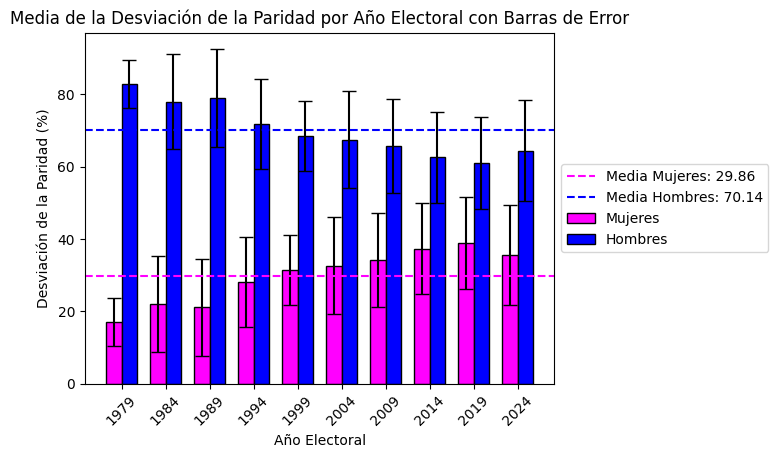

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
# Definir los años en los que hubo elecciones europeas
valid_years = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024]
# Filtrar los datos para que solo incluyan los años válidos
filtered_df = combined_df[combined_df['Year'].isin(valid_years)]
# Calcular la media de la distribución de género para hombres y mujeres para cada año electoral, redondeado a dos decimales
gender_means = filtered_df.groupby('Year').agg({
    'WOMEN': lambda x: round(x.mean(), 2),
    'MEN': lambda x: round(x.mean(), 2)
}).reset_index()
# Calcular la desviación estándar de la distribución de género para hombres y mujeres para cada año electoral, redondeado a dos decimales
gender_std = filtered_df.groupby('Year').agg({
    'WOMEN': lambda x: round(x.std(), 2),
    'MEN': lambda x: round(x.std(), 2)
}).reset_index()
# Crear el gráfico de barras con barras de error para las mujeres y hombres
plt.figure(figsize=(8, 5))
# Establecer el ancho de las barras
bar_width = 0.35
index = np.arange(len(gender_means['Year']))
# Barras para las mujeres (color magenta)
plt.bar(index, gender_means['WOMEN'], yerr=gender_std['WOMEN'], width=bar_width, color='magenta', label='Mujeres', edgecolor='black', capsize=5)
# Barras para los hombres (color azul), desplazadas para que no se superpongan
plt.bar(index + bar_width, gender_means['MEN'], yerr=gender_std['MEN'], width=bar_width, color='blue', label='Hombres', edgecolor='black', capsize=5)
# Añadir las líneas de la media global para mujeres y hombres
plt.axhline(gender_means['WOMEN'].mean(), color='magenta', linestyle='--', label='Media Mujeres: {}'.format(round(gender_means['WOMEN'].mean(), 2)))
plt.axhline(gender_means['MEN'].mean(), color='blue', linestyle='--', label='Media Hombres: {}'.format(round(gender_means['MEN'].mean(), 2)))
# Etiquetas y título
plt.xlabel('Año Electoral')
plt.ylabel('Desviación de la Paridad (%)')
plt.title('Media de la Desviación de la Paridad por Año Electoral con Barras de Error')
plt.xticks(index + bar_width / 2, valid_years, rotation=45)
# Colocar la leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2.5)
plt.subplots_adjust(top=0.9)
plt.savefig('media_desviacion_paridad_género.png')
plt.show()

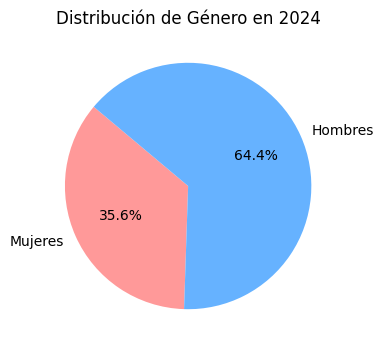

In [ ]:
# @title
# Filtrar los datos para 2024
gender_2024 = gender_means[gender_means['Year'] == 2024]
# Crear el gráfico de tartas
labels = ['Mujeres', 'Hombres']
sizes = [gender_2024['WOMEN'].values[0], gender_2024['MEN'].values[0]]
colors = ['#FF9999', '#66B2FF']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Género en 2024')
plt.savefig('piechart_gender_2024.png')
plt.show()

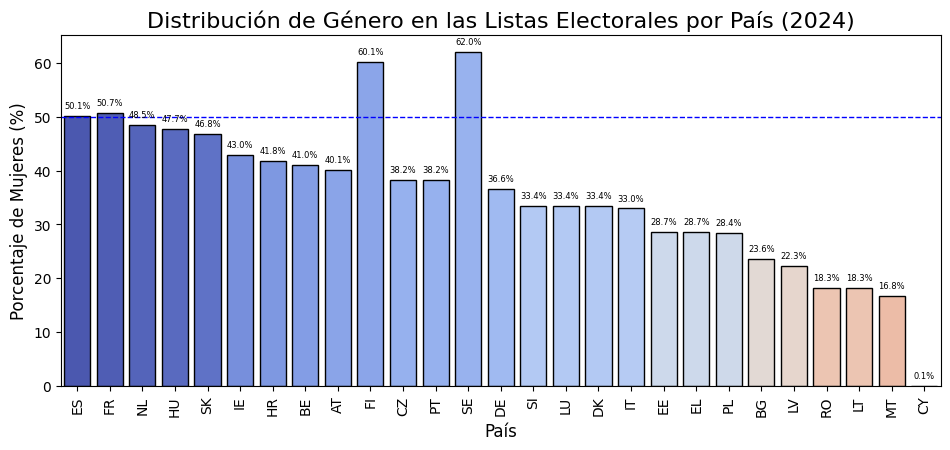

In [ ]:
# @title
df_2024 = combined_df[combined_df['Year'] == 2024].copy()
# Agreg
df_2024['WOMEN'] += 0.1  # Ajuste mínimo
df_2024['Parity_Index'] = abs(df_2024['WOMEN'] - 50)  # Calcular el índice de paridad
# Ordenar los países por Parity_Index
df_2024 = df_2024.sort_values('Parity_Index', ascending=True)
# Normalizar los valores de Parity_Index para mapear a una paleta de colores
norm = plt.Normalize(df_2024['Parity_Index'].min(), df_2024['Parity_Index'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
# Crear la lista de colores basada en Parity_Index
colors = [sm.to_rgba(pi) for pi in df_2024['Parity_Index']]
# Configurar un tamaño de gráfico más grande
plt.figure(figsize=(10, 5))  # Aumentar el tamaño del gráfico
# Crear el gráfico de barras con los colores degradados según Parity_Index
barplot = sns.barplot(
    x='COUNTRY_ID',
    y='WOMEN',
    data=df_2024,
    palette=colors,
    edgecolor='black'
)
# Agregar las etiquetas de porcentaje en las barras, con una mejor referencia a las posiciones X
for index, row in enumerate(df_2024.itertuples()):
    barplot.text(index, row.WOMEN + 1, f"{round(row.WOMEN, 1)}%",
                 color='black', ha="center", va='bottom', size=6)
# Agregar la línea de paridad al 50%
plt.axhline(50, linestyle='--', color='blue', linewidth=1)
# Configurar las etiquetas y título del gráfico
plt.title('Distribución de Género en las Listas Electorales por País (2024)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje de Mujeres (%)', fontsize=12)
# Rotar las etiquetas del eje X
plt.xticks(rotation=90)
# Ajustar los márgenes para evitar la superposición
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.tight_layout(pad=2.5)
plt.savefig('barplot_gender_country_2024.png')
plt.show()

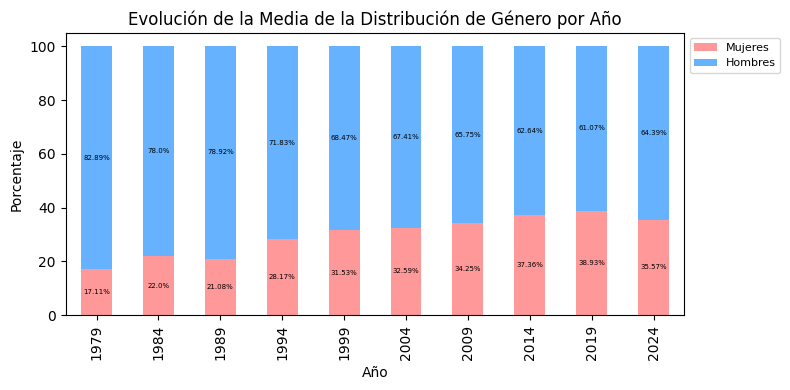

In [ ]:
# @title
# Crear el gráfico apilado
ax = gender_means.plot(
    x='Year',
    kind='bar',
    stacked=True,
    color=['#FF9999', '#66B2FF'],
    figsize=(8, 4)
)
# Añadir etiquetas en el centro de las barras con tamaño reducido
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            f'{round(height, 2)}%',
            ha='center',
            va='center',
            fontsize=5)  # Reducir el tamaño del texto dentro de las barras
# Reducir el tamaño del título y las etiquetas de los ejes
plt.title('Evolución de la Media de la Distribución de Género por Año', fontsize=12)
plt.xlabel('Año', fontsize=10)  # Reducir el tamaño de la etiqueta del eje X
plt.ylabel('Porcentaje', fontsize=10)  # Reducir el tamaño de la etiqueta del eje Y
# Ajustar el tamaño de la leyenda
plt.legend(['Mujeres', 'Hombres'], loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
# Ajustar el diseño para evitar que los elementos se sobrepongan
plt.tight_layout()
# Mostrar el gráfico
plt.savefig('barplot_gender_evolution.png')
plt.show()

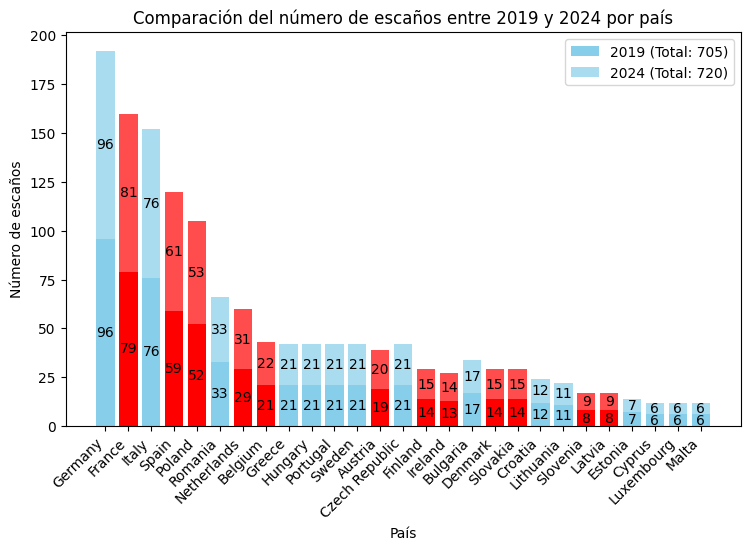

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
# Datos corregidos
data = pd.DataFrame({
    "country": ["Germany", "France", "Italy", "Spain", "Poland", "Romania",
                "Netherlands", "Belgium", "Greece", "Hungary", "Portugal",
                "Sweden", "Austria", "Czech Republic", "Finland",
                "Ireland", "Bulgaria", "Denmark", "Slovakia", "Croatia",
                "Lithuania", "Slovenia", "Latvia", "Estonia",
                "Cyprus", "Luxembourg", "Malta"],
    "eurodiputados_2019": [96, 79, 76, 59, 52, 33, 29, 21, 21, 21, 21, 21,
                           19, 21, 14, 13, 17, 14, 14, 12, 11, 8, 8, 7, 6, 6, 6],
    "eurodiputados_2024": [96, 81, 76, 61, 53, 33, 31, 22, 21, 21, 21, 21,
                           20, 21, 15, 14, 17, 15, 15, 12, 11, 9, 9, 7, 6, 6, 6]
})
# Calcular el total de escaños en 2019 y 2024
total_2019 = data['eurodiputados_2019'].sum()
total_2024 = data['eurodiputados_2024'].sum()
# Calcular la diferencia
data['diferencia'] = data['eurodiputados_2024'] - data['eurodiputados_2019']
# Crear una columna para el color
data['color'] = ['red' if x != 0 else 'skyblue' for x in data['diferencia']]
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(data['country'], data['eurodiputados_2019'], color=data['color'], label=f'2019 (Total: {total_2019})')
bar2 = ax.bar(data['country'], data['eurodiputados_2024'], bottom=data['eurodiputados_2019'], color=data['color'], alpha=0.7, label=f'2024 (Total: {total_2024})')
# Añadir etiquetas
for i in range(len(data)):
    ax.text(i, data['eurodiputados_2019'][i] / 2, str(data['eurodiputados_2019'][i]), ha='center', va='center', color='black')
    ax.text(i, data['eurodiputados_2019'][i] + data['eurodiputados_2024'][i] / 2, str(data['eurodiputados_2024'][i]), ha='center', va='center', color='black')
# Añadir títulos y etiquetas
ax.set_xlabel('País')
ax.set_ylabel('Número de escaños')
ax.set_title('Comparación del número de escaños entre 2019 y 2024 por país')
ax.legend()
# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=2.5)
plt.savefig('barplot_eurodiputados.png')
plt.show()

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


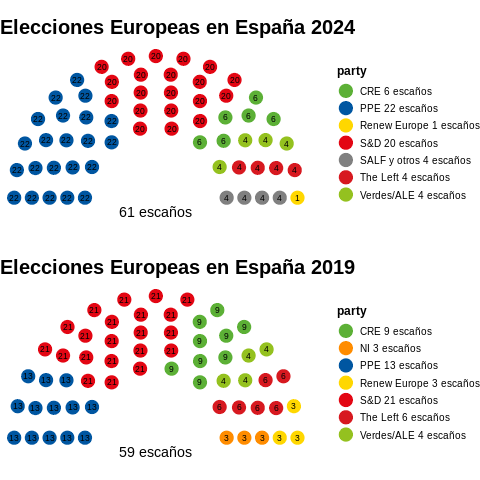

In [ ]:
# @title
%%R
# Datos de escaños para 2024
parliament_data_2024 <- data.frame(
  party = c("PPE", "S&D", "CRE", "Verdes/ALE", "The Left", "Renew Europe", "SALF y otros"),
  seats = c(22, 20, 6, 4, 4, 1, 4),
  colors = c("#0056A1", "#E30613", "#5CB036", "#94C11F", "#D71920", "#FFD700", "#808080")
)
# Añadir el número de escaños en el nombre de los partidos (para la leyenda)
parliament_data_2024$party <- paste(parliament_data_2024$party, parliament_data_2024$seats, "escaños")
# Preparar los datos para ggparliament
parliament_data_2024 <- parliament_data_2024 %>%
  parliament_data(election_data = ., type = "semicircle", parl_rows = 5, party_seats = .$seats)
# Crear el gráfico de hemiciclo para 2024
hemiciclo_2024 <- ggplot(parliament_data_2024, aes(x = x, y = y, fill = party)) +
  geom_parliament_seats(aes(color = party), size = 6) +  # Ajustar el tamaño de los asientos
  geom_text(aes(label = seats), size = 3, color = "black", vjust = 0.5) +  # Añadir etiquetas de escaños en los asientos
  scale_fill_manual(values = setNames(parliament_data_2024$colors, parliament_data_2024$party)) +  # Aplicar colores personalizados
  scale_color_manual(values = setNames(parliament_data_2024$colors, parliament_data_2024$party)) +  # Aplicar bordes de color
  coord_fixed() +  # Mantener proporciones fijas
  theme_void() +  # Eliminar fondo
  labs(title = "Elecciones Europeas en España 2024") +  # Título
  annotate("text", x = 0, y = -0.2, label = "61 escaños", size = 5, hjust = 0.5) +  # Texto del número de escaños
  theme(
    plot.title = element_text(hjust = 0, size = 20, face = "bold", margin = margin(b = 10)),  # Centrar el título
    legend.position = "right",  # Posición de la leyenda
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10),
    legend.margin = margin(l = 20))
  ggsave("hemiciclo_2024.png")
# Ahora los datos para 2019
parliament_data_2019 <- data.frame(
  party = c("PPE", "S&D", "CRE", "Verdes/ALE", "The Left", "Renew Europe", "NI", "SALF y otros"),
  seats = c(13, 21, 9, 4, 6, 3, 3, 0),
  colors = c("#0056A1", "#E30613", "#5CB036", "#94C11F", "#D71920", "#FFD700", "#FF8C00", "#808080")
)
# Añadir el número de escaños en el nombre de los partidos (para la leyenda)
parliament_data_2019$party <- paste(parliament_data_2019$party, parliament_data_2019$seats, "escaños")
# Preparar los datos para ggparliament
parliament_data_2019 <- parliament_data_2019 %>%
  parliament_data(election_data = ., type = "semicircle", parl_rows = 5, party_seats = .$seats)
# Crear el gráfico de hemiciclo para 2019
hemiciclo_2019 <- ggplot(parliament_data_2019, aes(x = x, y = y, fill = party)) +
  geom_parliament_seats(aes(color = party), size = 6) +
  geom_text(aes(label = seats), size = 3, color = "black", vjust = 0.5) +
  scale_fill_manual(values = setNames(parliament_data_2019$colors, parliament_data_2019$party)) +
  scale_color_manual(values = setNames(parliament_data_2019$colors, parliament_data_2019$party)) +
  coord_fixed() +
  theme_void() +
  labs(title = "Elecciones Europeas en España 2019") +
  annotate("text", x = 0, y = -0.2, label = "59 escaños", size = 5, hjust = 0.5) +
  theme(
    plot.title = element_text(hjust = 0, size = 20, face = "bold", margin = margin(b = 10)),
    legend.position = "right",  # Posición de la leyenda
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10),
    legend.margin = margin(l = 20))
ggsave("hemiciclo_2019.png")
# Mostrar ambos gráficos uno tras otro
grid.arrange(hemiciclo_2024, hemiciclo_2019, ncol = 1)

Saving 6.67 x 6.67 in image


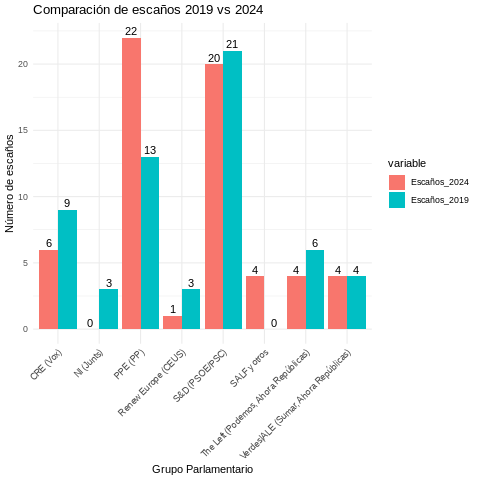

In [ ]:
# @title
%%R
# Usar los datos de escaños de 2024 y 2019 que ya creamos
escanos_2024 <- c(22, 20, 6, 4, 4, 1, 0, 4)
escanos_2019 <- c(13, 21, 9, 4, 6, 3, 3, 0)
grupos <- c("PPE (PP)", "S&D (PSOE/PSC)", "CRE (Vox)",
            "Verdes|ALE (Sumar, Ahora Repúblicas)", "The Left (Podemos, Ahora Repúblicas)",
            "Renew Europe (CEUS)", "NI (Junts)", "SALF y otros")
# Crear un dataframe con los datos
df_comparacion <- data.frame(
  Grupo_Parlamentario = grupos,
  Escaños_2024 = escanos_2024,
  Escaños_2019 = escanos_2019
)
# Reorganizar los datos para el gráfico con melt
df_melt <- melt(df_comparacion, id.vars = "Grupo_Parlamentario")
# Generar el gráfico con ggplot
p<-ggplot(df_melt, aes(x = Grupo_Parlamentario, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = value), vjust = -0.3, position = position_dodge(0.9)) +
  labs(title = "Comparación de escaños 2019 vs 2024",
       y = "Número de escaños",
       x = "Grupo Parlamentario") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("comparacion_escanos_2019_2024.png", plot = p)
print(p)

In [ ]:
# @title
# Instalar Dash y suprimir los mensajes de salida
!pip install dash > /dev/null 2>&1
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import json
import warnings
import plotly.io as pio
warnings.filterwarnings("ignore")
# Inicializar la aplicación Dash
app = dash.Dash(__name__)
# Lista de países de la Unión Europea actualizada
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]
# Descargar el archivo GeoJSON
!wget -O countries.geo.json 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json' > /dev/null 2>&1
# Cargar el archivo GeoJSON
with open('countries.geo.json') as f:
    world_geojson = json.load(f)
# Filtrar GeoJSON para solo incluir países de la UE
eu_geojson = {
    "type": "FeatureCollection",
    "features": [feature for feature in world_geojson["features"] if feature["properties"]["name"] in eu_countries]
}
# Crear el dataframe con los eurodiputados y variación respecto al año anterior
df = pd.DataFrame({
    "Country_Name": ["Germany", "France", "Italy", "Spain", "Poland", "Romania",
                     "Netherlands", "Belgium", "Greece", "Hungary", "Portugal",
                     "Sweden", "Austria", "Czech Republic", "Finland",
                     "Ireland", "Bulgaria", "Denmark", "Slovakia", "Croatia",
                     "Lithuania", "Slovenia", "Latvia", "Estonia",
                     "Cyprus", "Luxembourg", "Malta"],
    "eurodiputados_2019": [96, 79, 76, 59, 52, 33, 29, 21, 21, 21, 21, 21,
                           19, 21, 14, 13, 17, 14, 14, 12, 11, 8, 8, 7, 6, 6, 6],
    "eurodiputados_2024": [96, 81, 76, 61, 53, 33, 31, 22, 21, 21, 21, 21,
                           20, 21, 15, 14, 17, 15, 15, 12, 11, 9, 9, 7, 6, 6, 6],
    "Flag_Image": ["https://flagcdn.com/w40/de.png", "https://flagcdn.com/w40/fr.png",
                   "https://flagcdn.com/w40/it.png", "https://flagcdn.com/w40/es.png",
                   "https://flagcdn.com/w40/pl.png", "https://flagcdn.com/w40/ro.png",
                   "https://flagcdn.com/w40/nl.png", "https://flagcdn.com/w40/be.png",
                   "https://flagcdn.com/w40/gr.png", "https://flagcdn.com/w40/hu.png",
                   "https://flagcdn.com/w40/pt.png", "https://flagcdn.com/w40/se.png",
                   "https://flagcdn.com/w40/at.png", "https://flagcdn.com/w40/cz.png",
                   "https://flagcdn.com/w40/fi.png", "https://flagcdn.com/w40/ie.png",
                   "https://flagcdn.com/w40/bg.png", "https://flagcdn.com/w40/dk.png",
                   "https://flagcdn.com/w40/sk.png", "https://flagcdn.com/w40/hr.png",
                   "https://flagcdn.com/w40/lt.png", "https://flagcdn.com/w40/si.png",
                   "https://flagcdn.com/w40/lv.png", "https://flagcdn.com/w40/ee.png",
                   "https://flagcdn.com/w40/cy.png", "https://flagcdn.com/w40/lu.png",
                   "https://flagcdn.com/w40/mt.png"]
})
# Calcular la variación de eurodiputados
df['variacion'] = df['eurodiputados_2024'] - df['eurodiputados_2019']
# Crear el mapa interactivo solo con países de la UE
fig = px.choropleth(df,
                    geojson=eu_geojson,
                    locations="Country_Name",
                    featureidkey="properties.name",
                    color="eurodiputados_2024",
                    hover_name="Country_Name",
                    color_continuous_scale="Blues",
                    title="Número de Eurodiputados en 2024 por País",
                    height=700,
                    width=1200
                   )
# Ajustar el mapa para que se centre en Europa y ocupe más espacio
fig.update_geos(
    scope="europe",
    showcountries=True,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue",
    projection_type="mercator",
    fitbounds="locations"
)
# Callback para mostrar bandera y datos al hacer clic
@app.callback(
    Output('output-div', 'children'),
    [Input('choropleth', 'clickData')]
)
def update_flag_info(clickData):
    if clickData:
        country_name = clickData['points'][0]['location']
        country_row = df[df['Country_Name'] == country_name]
        flag_url = country_row['Flag_Image'].values[0]
        eurodiputados_2024 = country_row['eurodiputados_2024'].values[0]
        variacion = country_row['variacion'].values[0]

        # Determinar si hubo variación y cómo presentarla
        if variacion > 0:
            variacion_text = f"Aumento de {variacion} escaños desde 2019"
        elif variacion < 0:
            variacion_text = f"Disminución de {abs(variacion)} escaños desde 2019"
        else:
            variacion_text = "Sin variación del número de escaños respecto a 2019"
        # Crear la información que se mostrará al hacer clic
        info = f"País: {country_name}. Eurodiputados 2024: {eurodiputados_2024}; {variacion_text}"
        return html.Div([
            html.Img(src=flag_url, style={'height':'60px', 'margin': '10px'}),
            html.P(info, style={'font-size': '18px', 'margin-top': '10px'})
        ])
    return 'Haz clic en un país para ver la bandera, el número de eurodiputados y la variación respecto a 2019.'
# Configurar el layout de la aplicación
app.layout = html.Div([
    dcc.Graph(id='choropleth', figure=fig, style={'display': 'inline-block', 'vertical-align': 'top'}),
    html.Div(id='output-div', style={'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '20px', 'font-size': '18px'})
])
# Ejecutar la aplicación
app.run_server(mode='inline')


<IPython.core.display.Javascript object>

#**2.Análisis de los datos de participación electoral en las elecciones europeas**
---
En este apartado vamos a analizar la participación electoral en las últimas elecciones europeas, identificando el país con menor participación y el que mayor participación electoral ha tenido, así como la media de la Unión Europea, y la evolución histórica de participación en todas las elecciones europeas celebradas hasta la fecha.

He elaborado tres tipos de gráficos ( box plots, histograma y gráfico de barras con error bar); en los tres podemos identificar las pautas siguientes:

> a) En el Box plot: existencia de valores atípicos: Los puntos negros indican valores atípicos o outliers, son tasas de participación significativamente diferentes de la mayoría de los datos en un año en particular. Por ejemplo, en los años 2009, 2014, 2019, y 2024 se observan varios valores atípicos que indican que algunos países tuvieron tasas de participación excepcionalmente altas o bajas en comparación con otros países en esos mismos años.

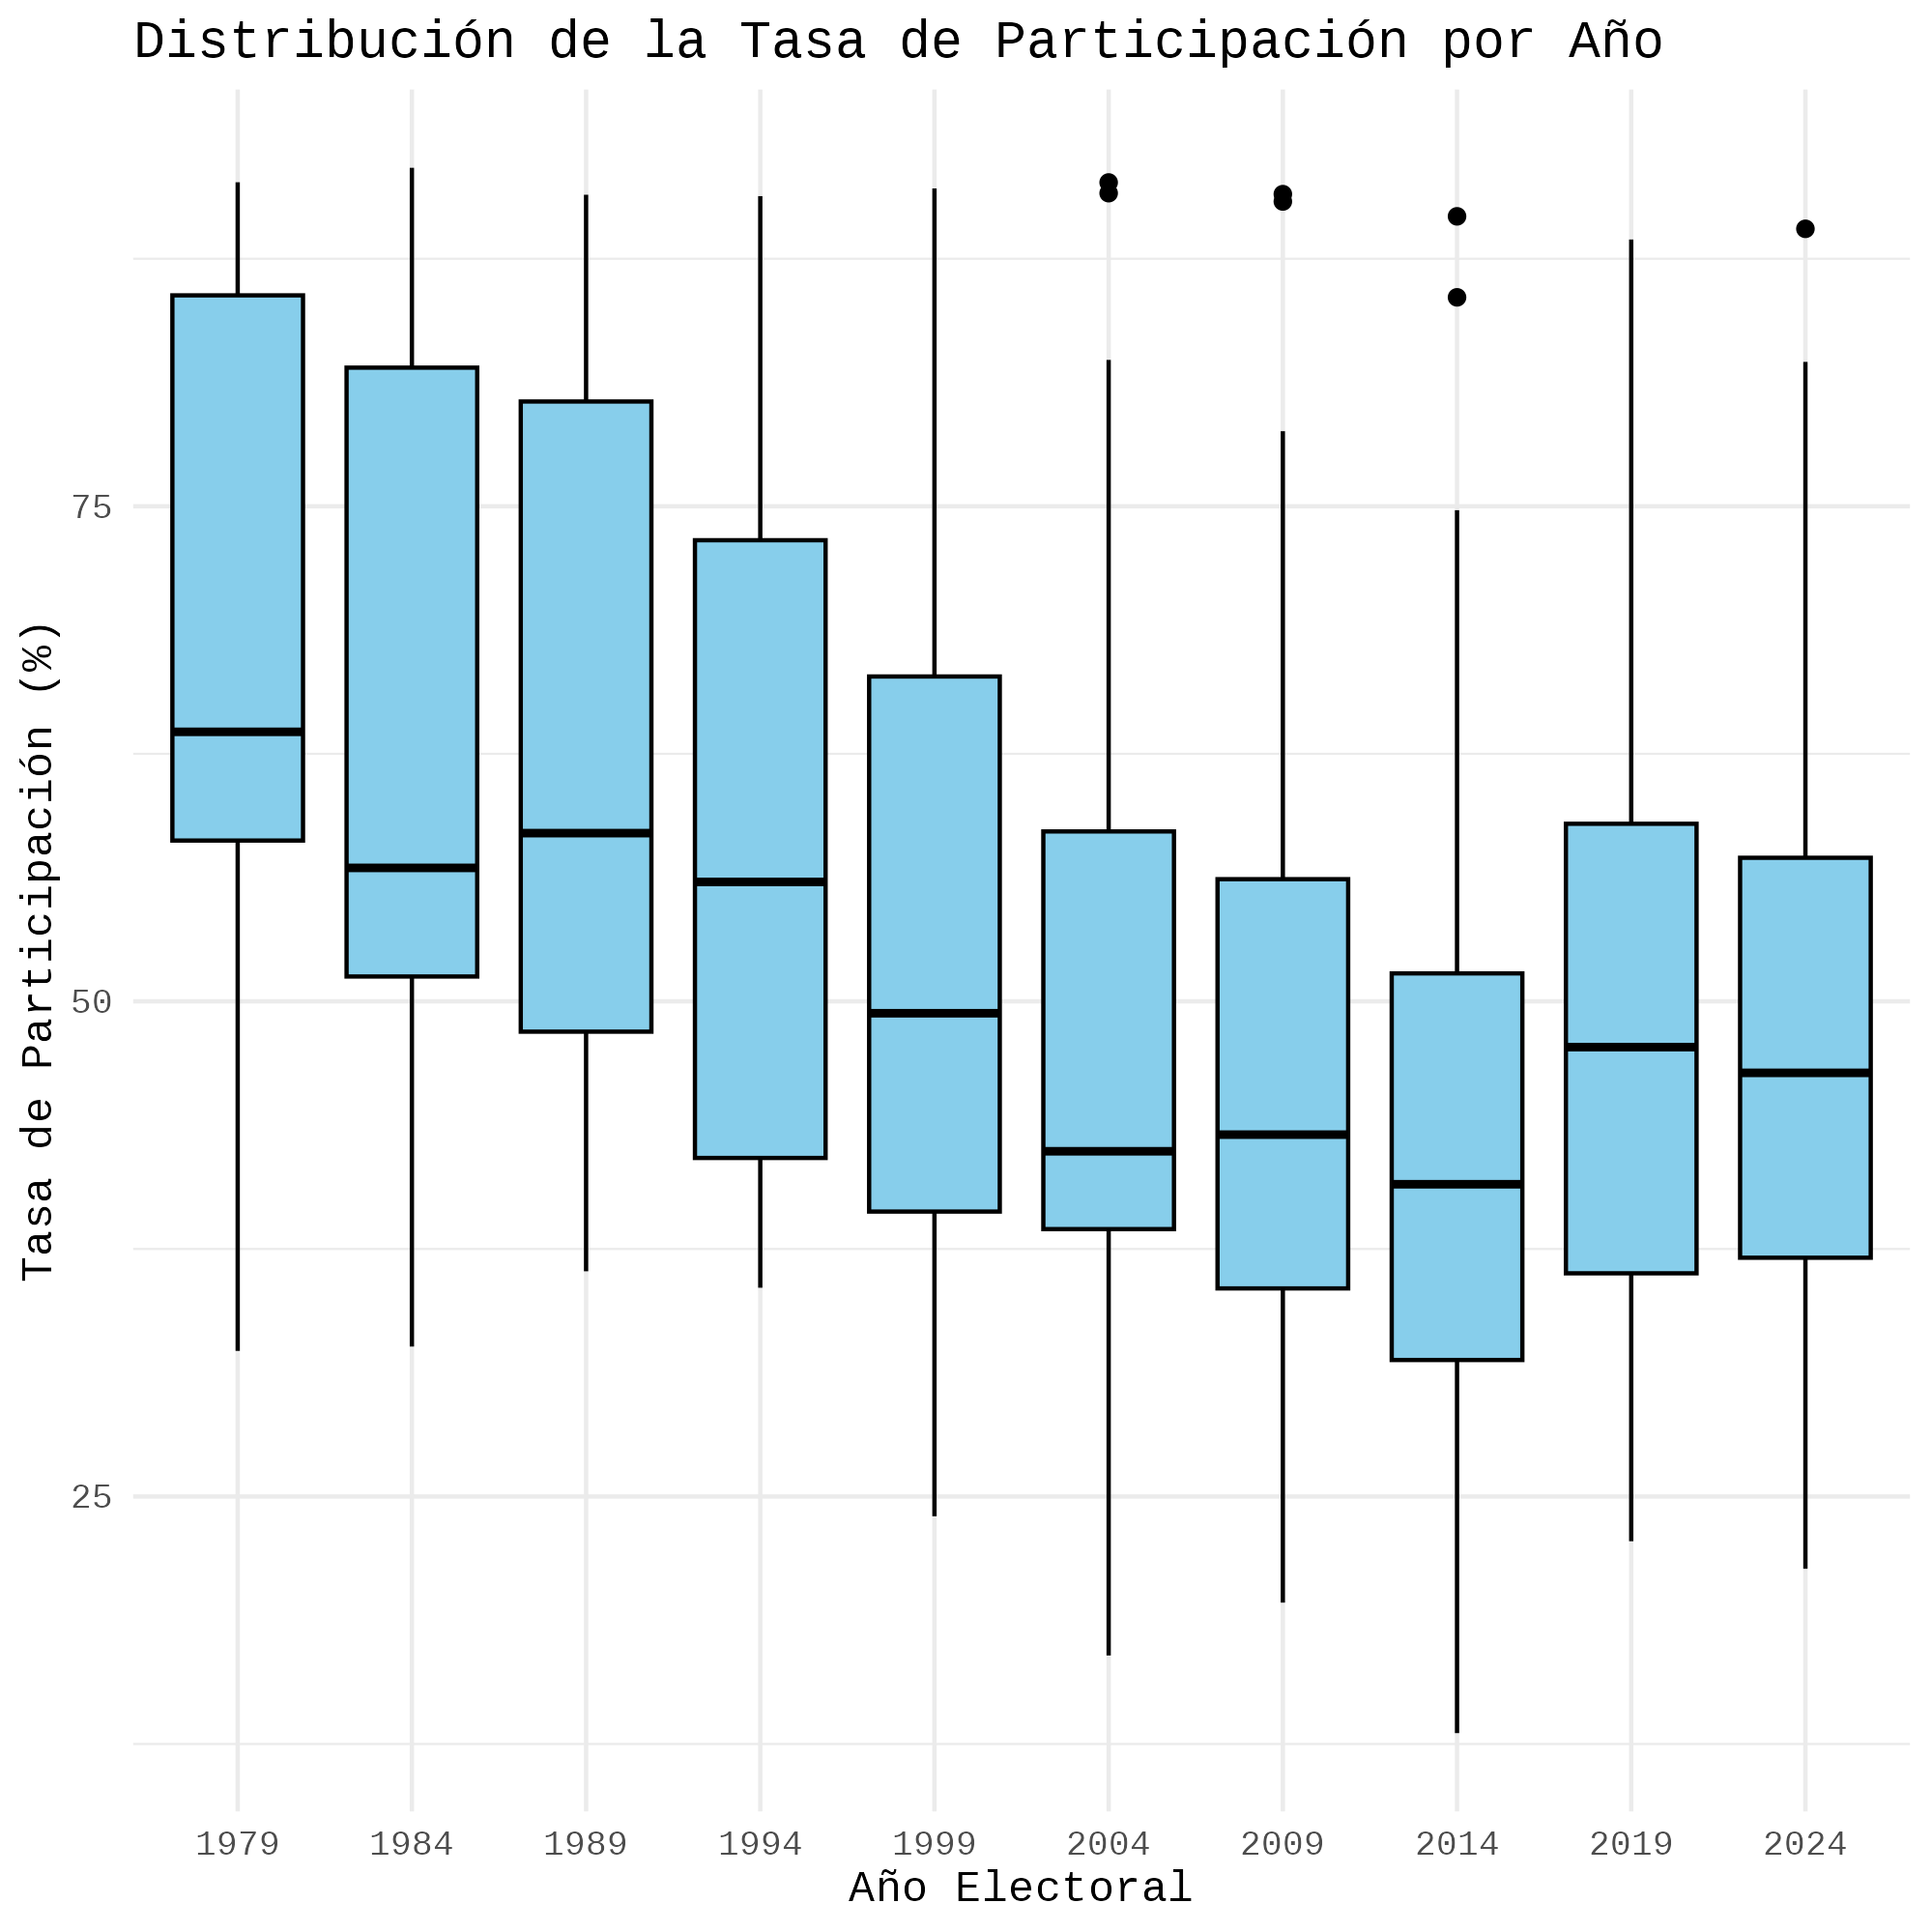

In [ ]:
from IPython.display import Image
Image('/content/boxplot_turnout.png', width=480)


 b) Tendencia General: Se puede observar una tendencia decreciente en la participación a lo largo del tiempo, especialmente desde 1999 en adelante, lo que sugiere una disminución en la participación electoral en la UE.La participación promedio más alta fue en 1979, con un 66.0%, y ha disminuido de manera constante hasta alcanzar un mínimo en 2014 con un 43.3%. Esta tendencia podría ser indicativa de una creciente desafección electoral o cambios demográficos y políticos que afectaron la participación.
Distribución de la Participación:

*   1979 y 1984: Las participaciones tienden a estar concentradas en la parte más alta del espectro, con la mayoría de los países teniendo participaciones relativamente altas.
*   1989 - 1999: Se observa un rango más amplio de tasas de participación, con la aparición de más variabilidad en la participación entre los países. Sin embargo, la mayoría aún tiene tasas superiores al 50%.
*   2004 y 2009: Se empieza a notar una caída en la participación, con más países cayendo en los rangos más bajos (por debajo de 50%).
2014 y 2019: La participación continúa mostrando un patrón más disperso, con varios países teniendo tasas de participación bajas, incluso algunos por debajo del 25%.
*   2024: Aunque todavía se ven algunas altas participaciones, la mayoría de los países parece estar en el rango medio (25%-50%), lo que indica una tendencia a una participación moderada o baja en la mayoría de los países.

Hay que tener en cuenta que hay países en donde el voto es obligatorio y la participación es lógicamente mayor como es el caso de Bégica, Bulgaria, Chipre, Grecia y Luxemburgo.

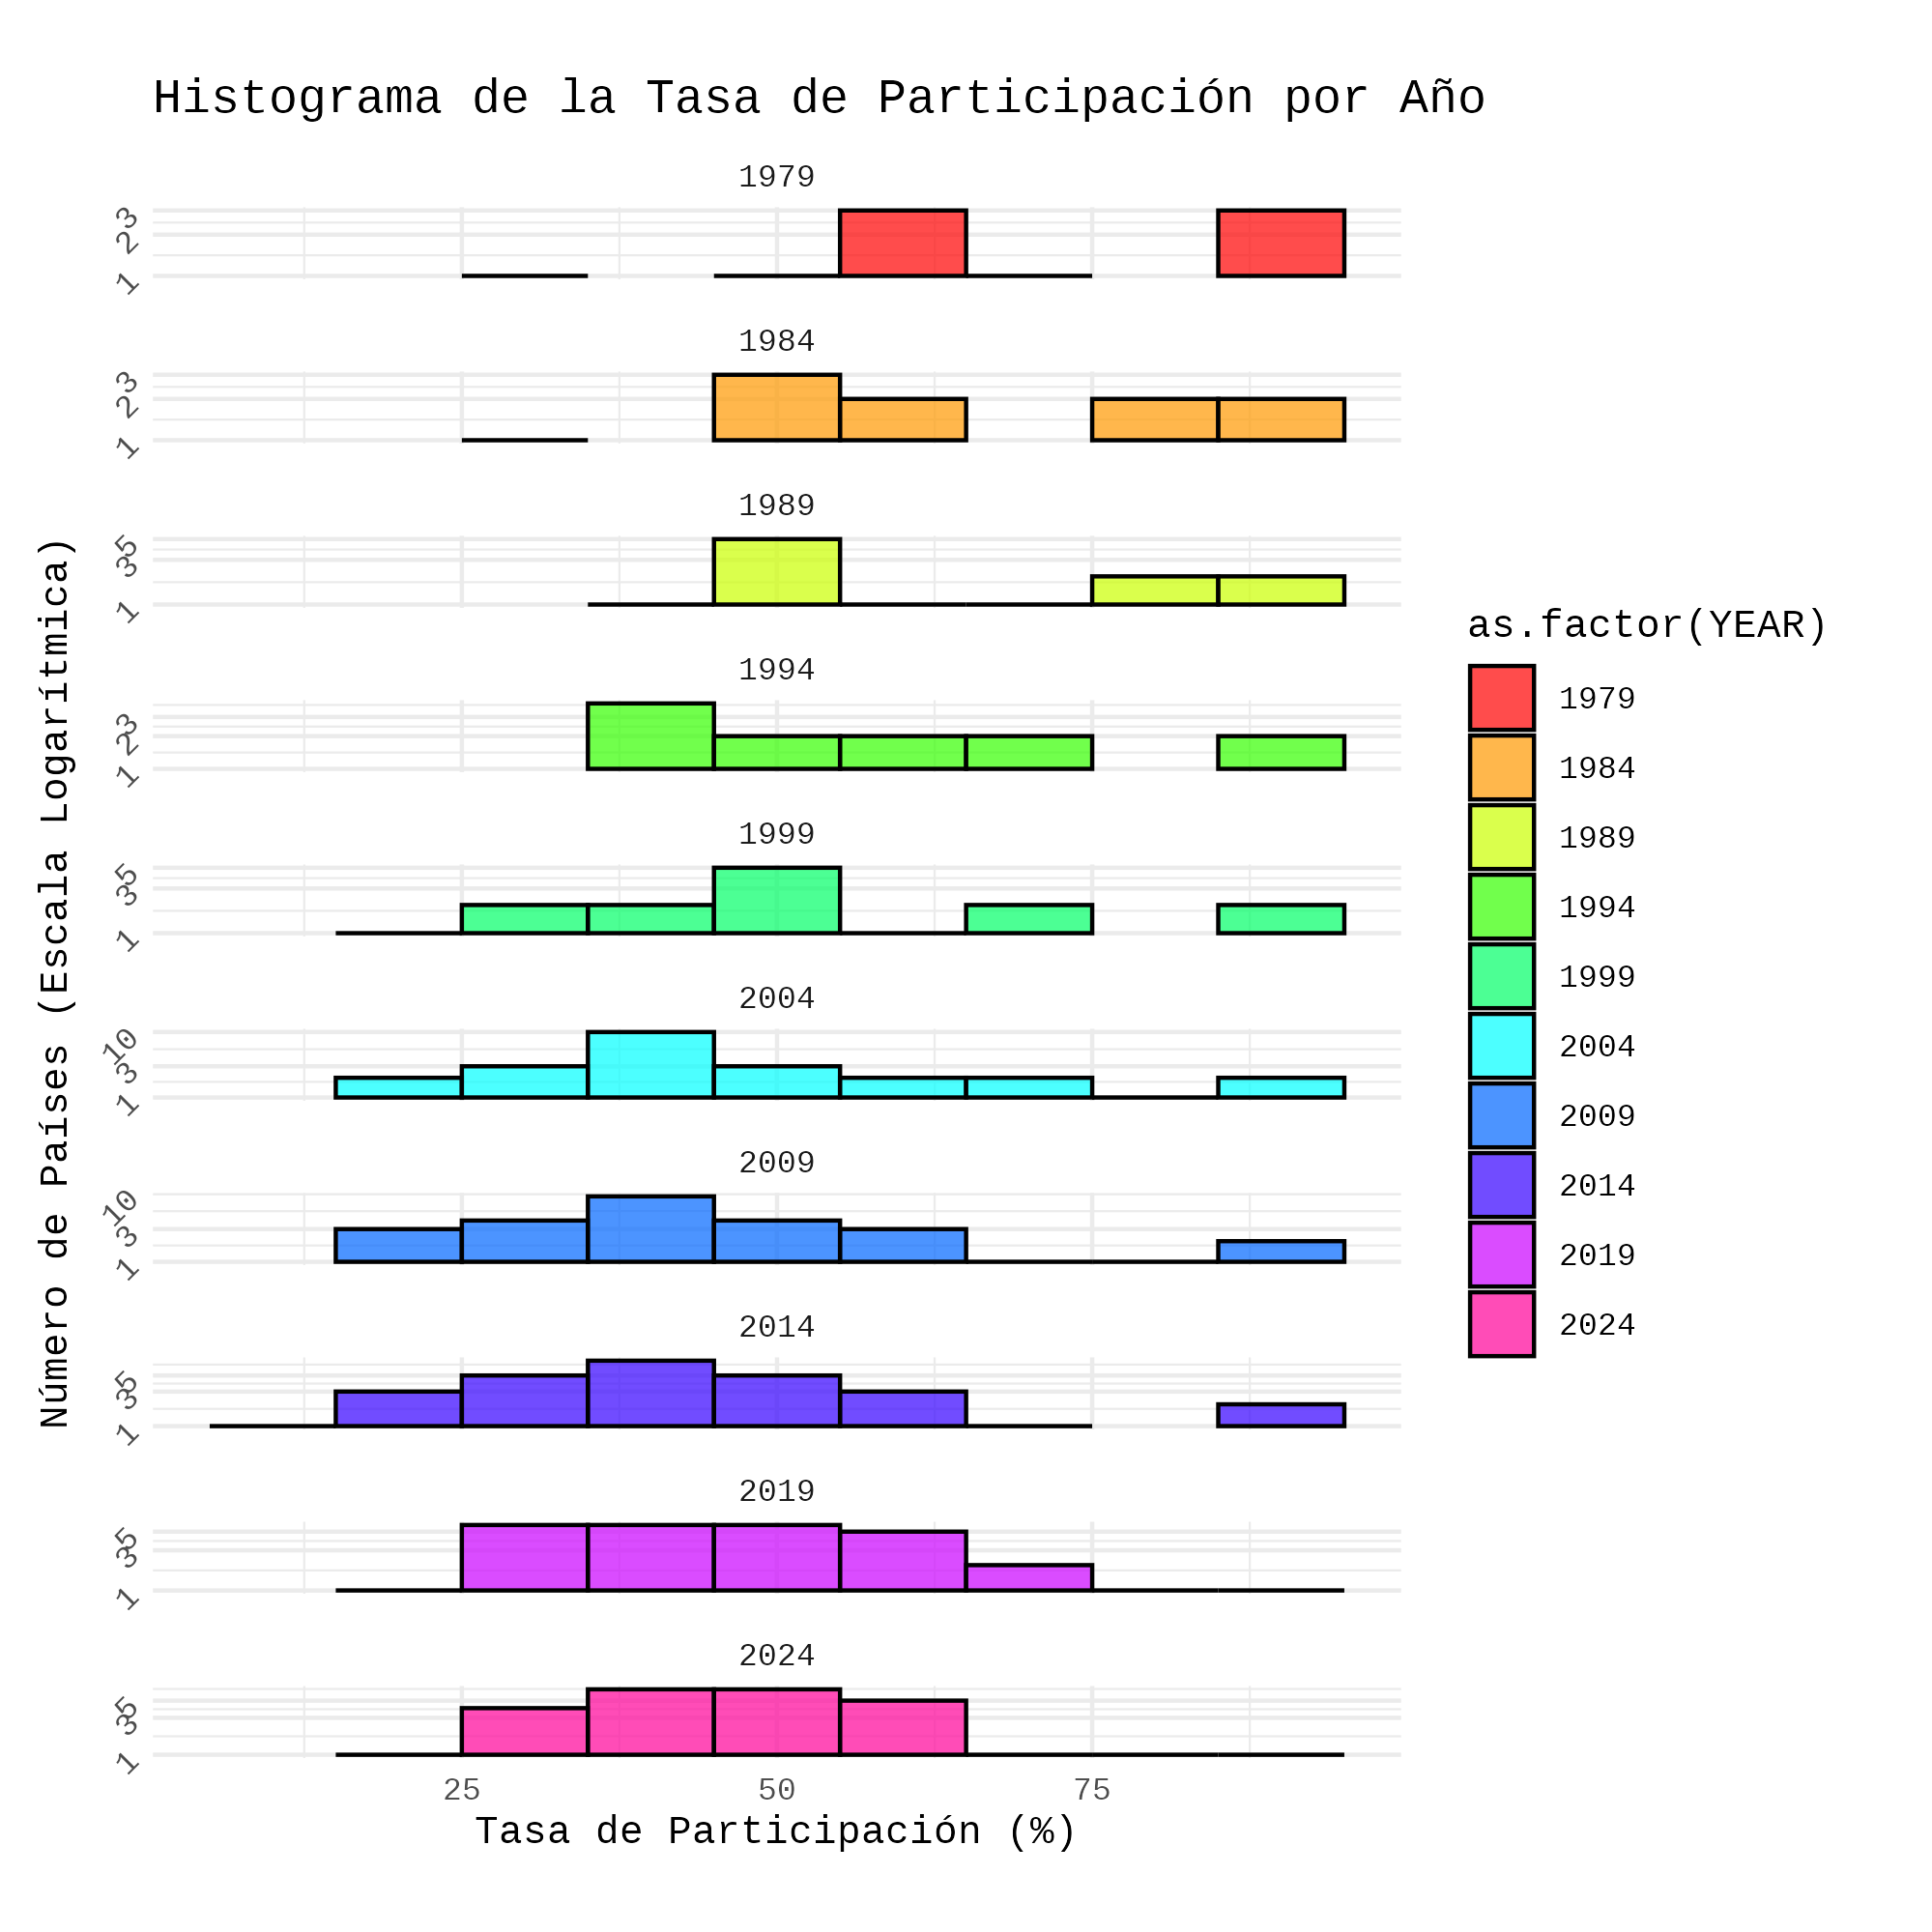

In [ ]:
from IPython.display import Image
Image('/content/histograma_turnout.png', width=480)

> c) Variabilidad: La dispersión de las tasas de participación parece aumentar en los años más recientes, lo que sugiere una mayor heterogeneidad en la participación electoral entre los países de la UE en esos años. Esto podría estar relacionado con la ampliación de la UE y la inclusión de países con diferentes tradiciones electorales.

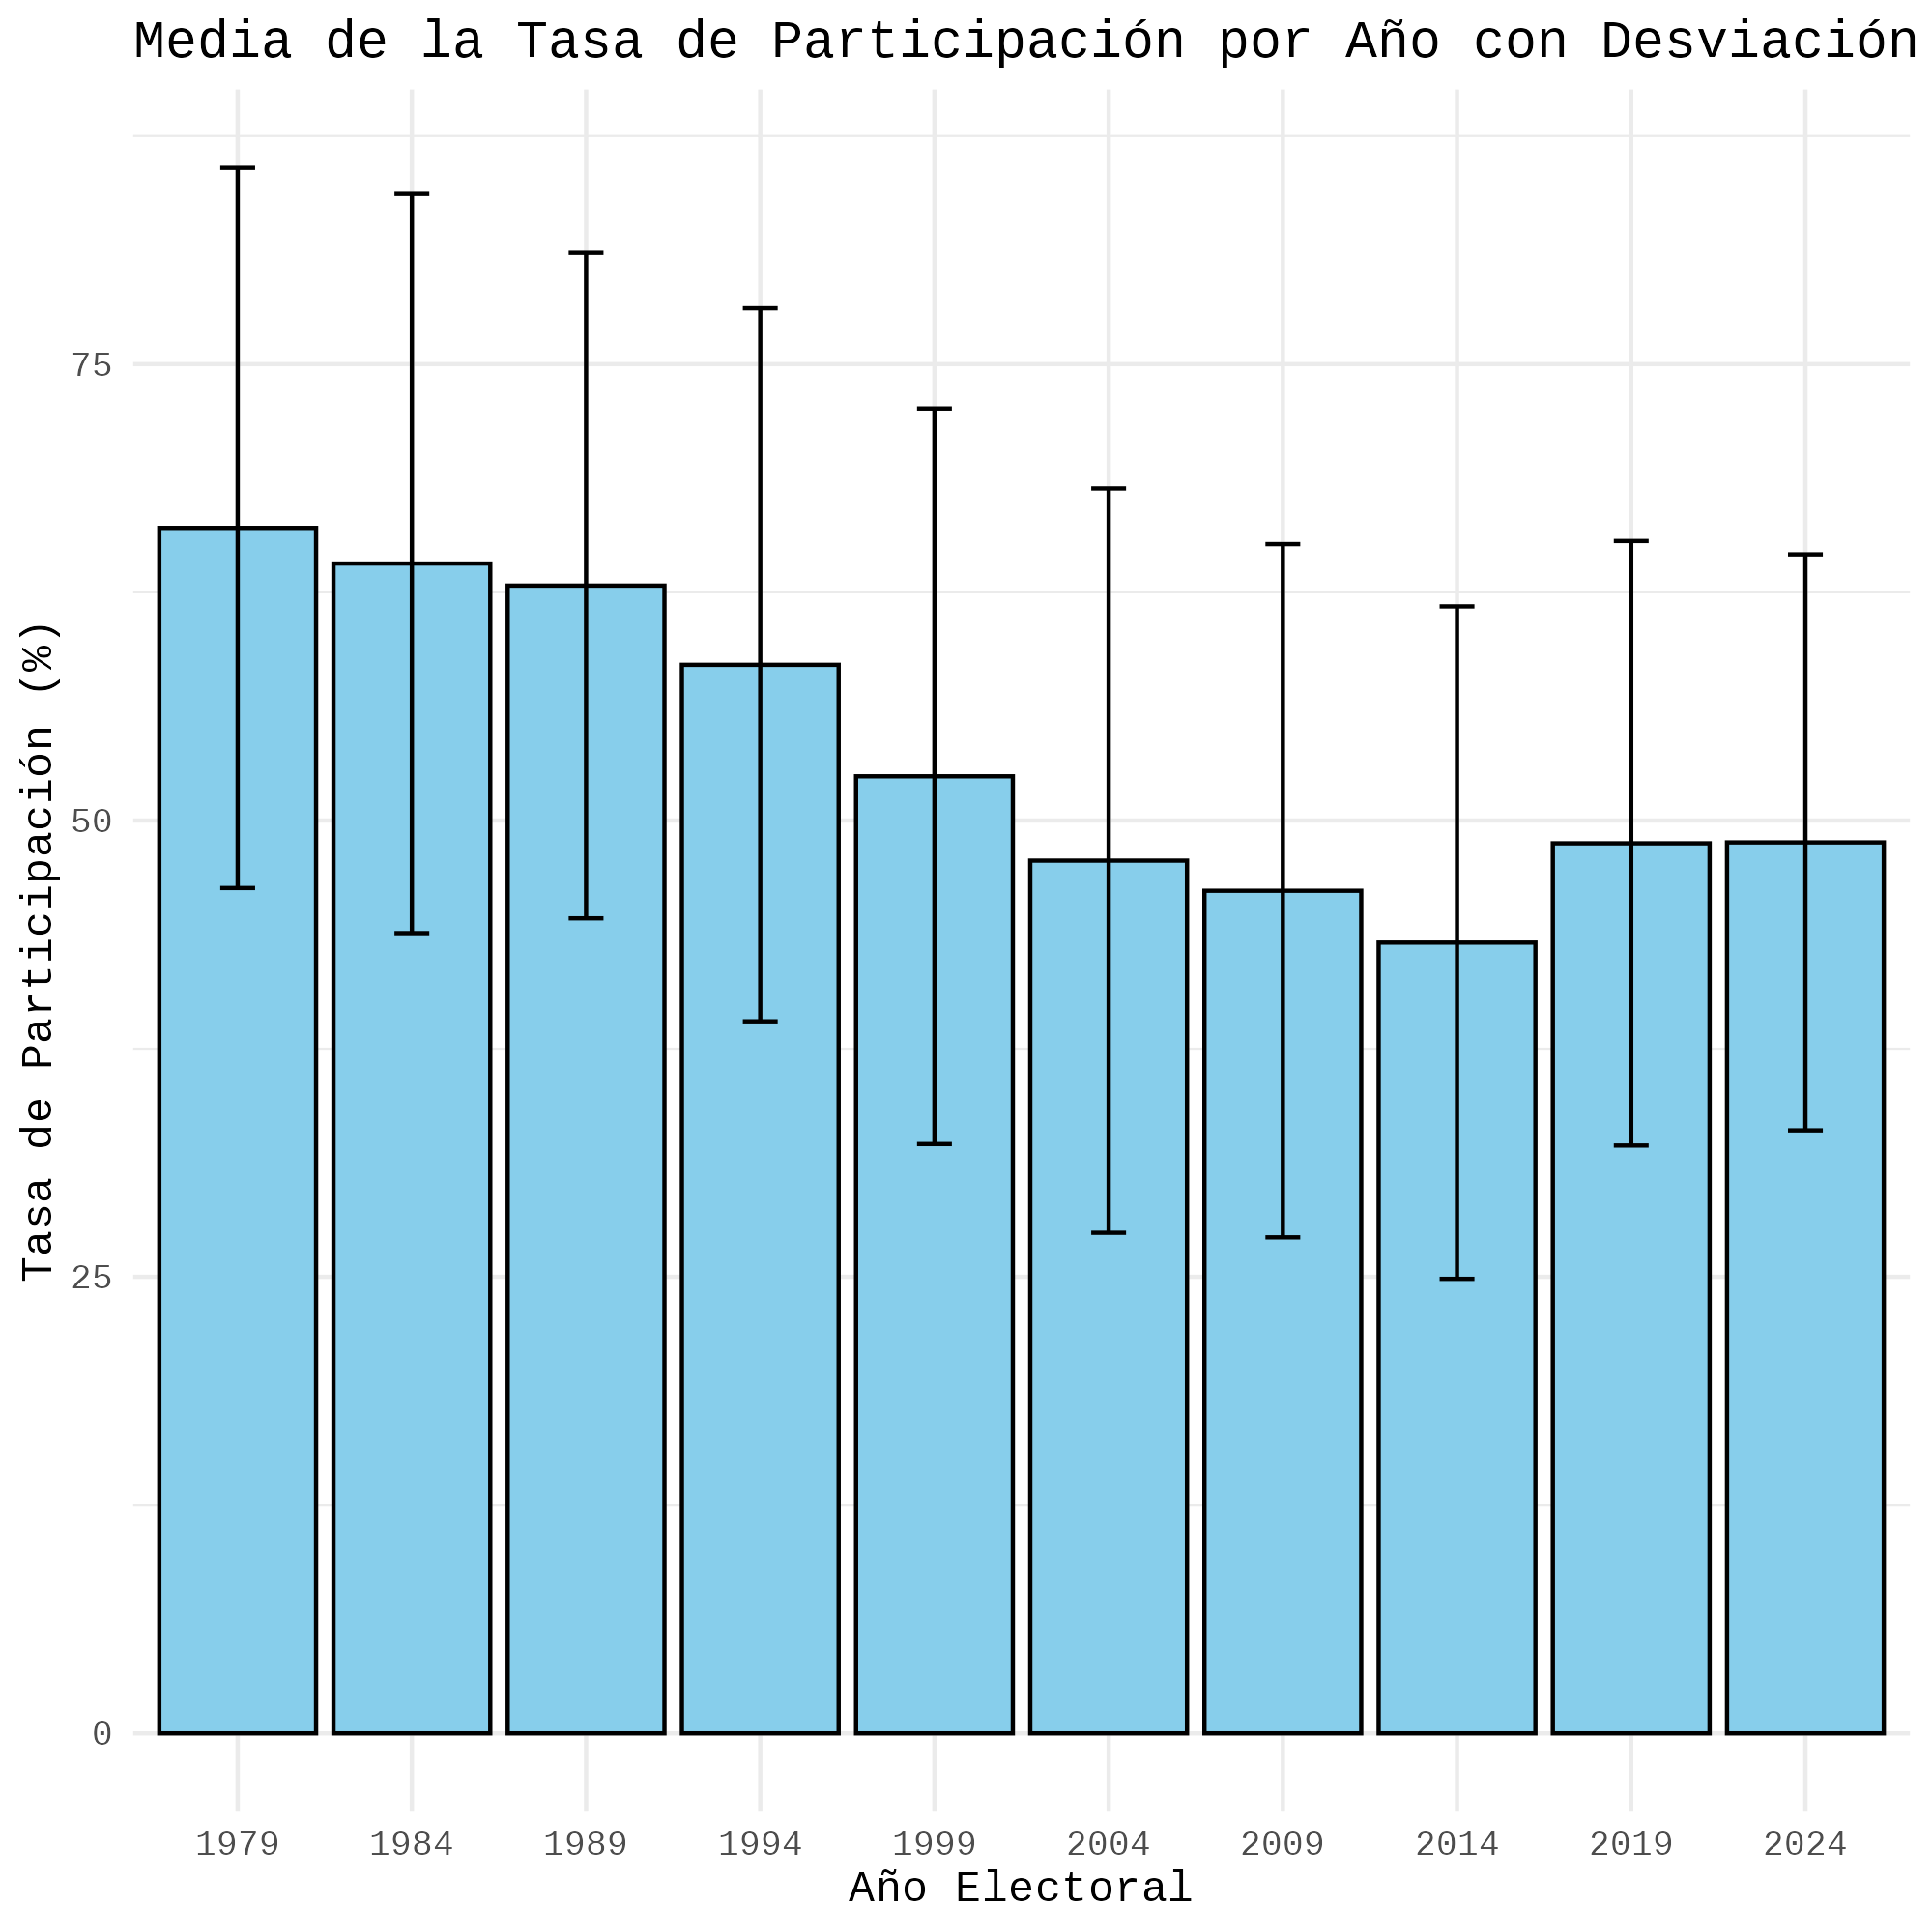

In [ ]:
from IPython.display import Image
Image('/content/barplot_turnout.png', width=480)

Evolución de la media de la participación electoral por año
Vamos a ver la evolución de la participación electoral desde el inicio de la celebración de las elecciones europeas en 1979 hasta las últimas elecciones celebradas en 2024.
Se observa una tendencia general descendente en la tasa de participación a lo largo del tiempo, alcanzando el mínimo de participación en 2014 con un 43.32%, teniendo el máximo de participación en 1979 con 66.03%
Las barras verticales grises represntan la dispersión de los datos en cada año, dando una muestra de las variabilidad de las tasas de participación entre los distintos países.

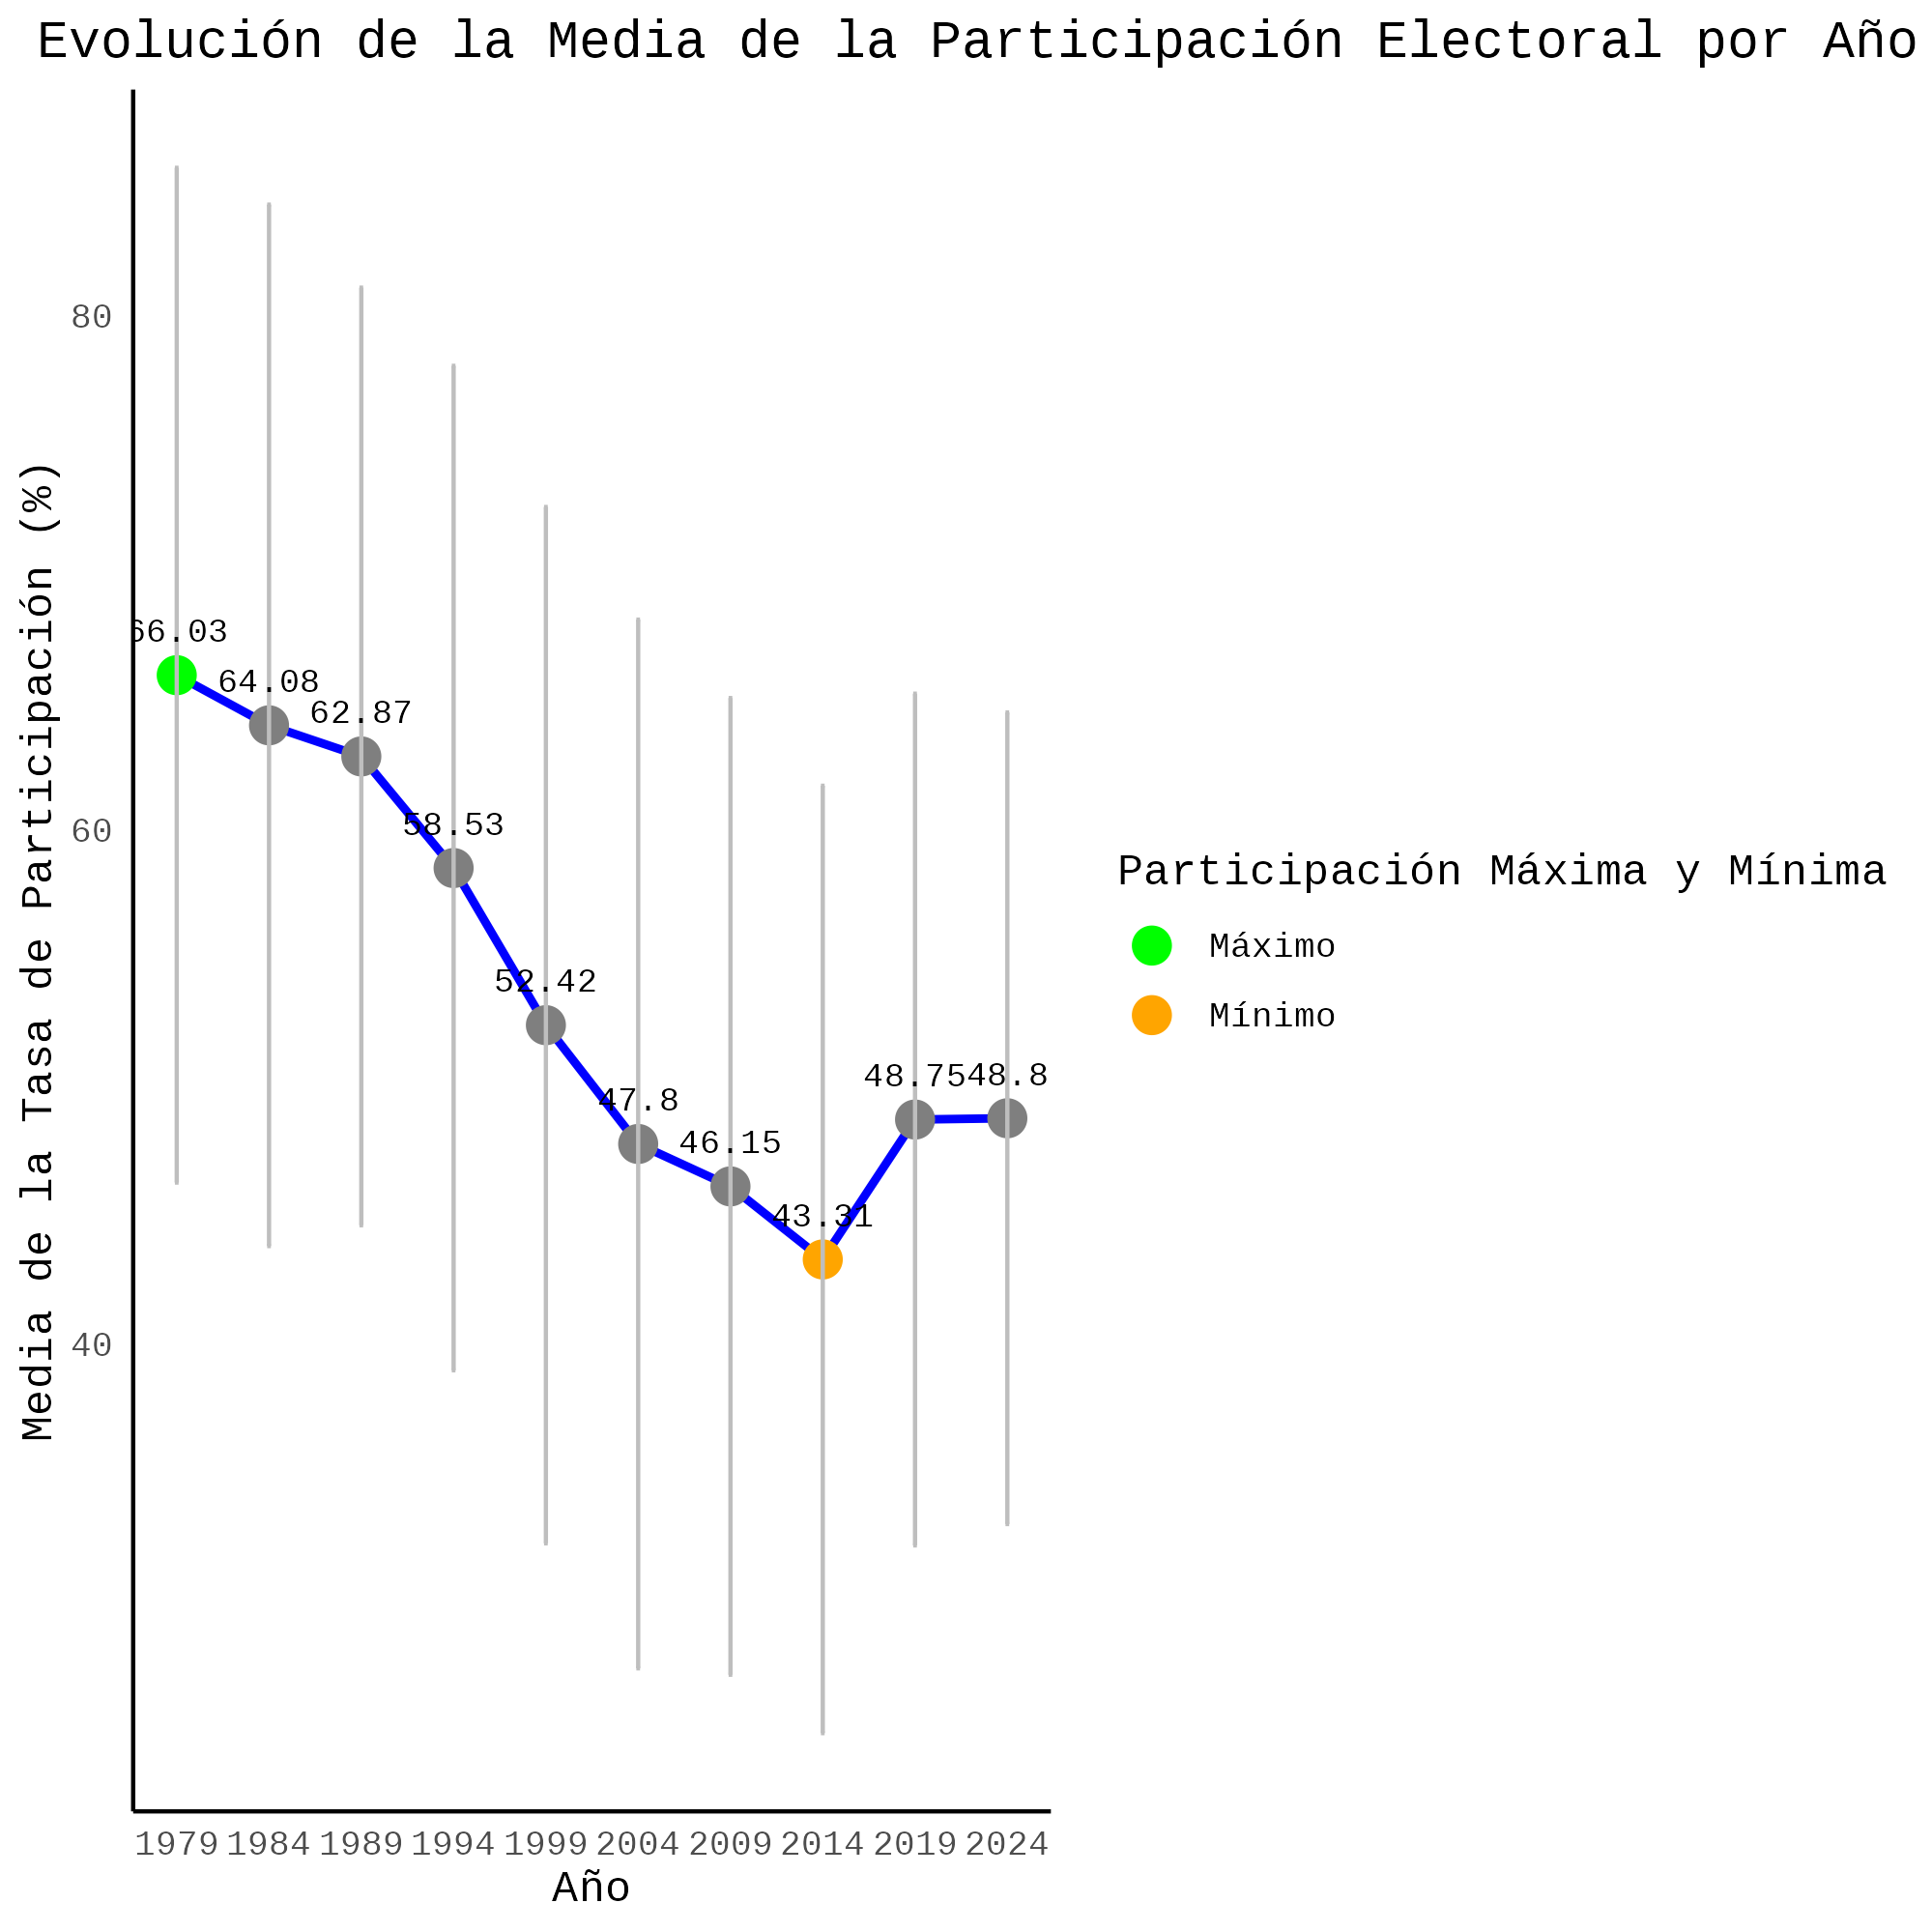

In [ ]:
from IPython.display import Image
Image('/content/evolucion_turnout.png', width=580)

Al analizar la participación electoral de los países de la Unión Europea, nos encontramos con diferencias significativas entre los páises
*   Bélgica tiene la tasa de participación más alta con un 89.01%; allí el voto es obligatorio.Otros países con alta participación incluyen Luxemburgo (82.29%), Malta (72.39%), y Alemania (67.74%).
*   El promedio de la participación de la Unión Europea se sitúa en 48.8%
*   La participación más baja es la de Croacia con 17.56%, seguida de Lituania con un 19.88%; el resto de países con una baja participación electoral incluyen a Bulgaria (22.43%), Letonia (25.01%), y Eslovaquia (27.15%).
*   Como vemos la variabilidad de las tasas de participación es considerable, desde el 90% en Bélgica hat menos del 20% en Croacia; sin duda, la historia política de cada país y la reciente incoporación de los países llamados del Este a la Unión Europea, incida en este resultado.

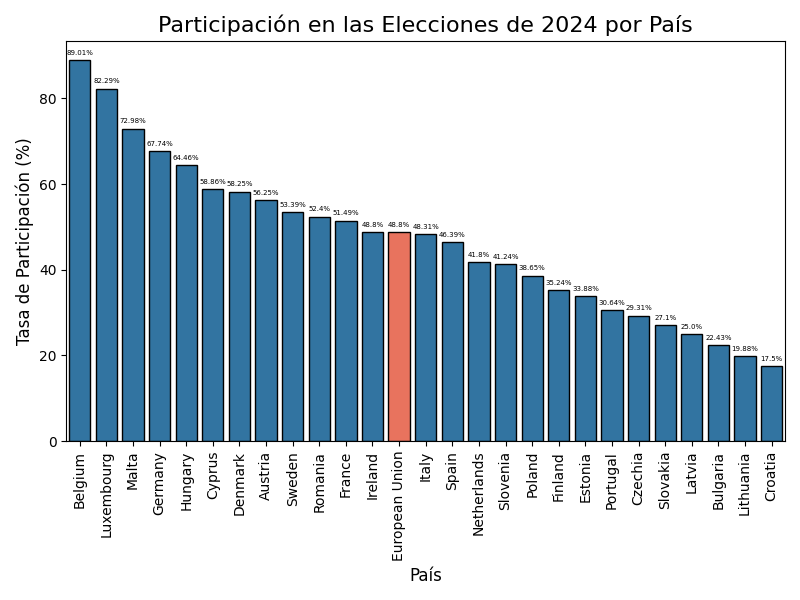

In [ ]:
from IPython.display import Image
Image('/content/participacion_2024.png', width=800)

# **3.Análisis de los datos de Paridad de Género**

##**3.1.   Análisis de desviación sobre la paridad de género de los países.**


Analizando la información proporcionada por los gráficos, podemos destacar:

> a) En el primer gráfico que representa la desviación de la paridad por países, vemos que la distribución de la desviación de la paridad no es uniforme, con algunos países muy cercanos a la paridad y otros con una desviación significativa, lo que resalta las diferencias regionales en cuanto a la igualdad de género; Chipre destaca significativamente con una desviación cercana al 50%, mientras que España y Francia son los países que más se acercan a la paridad de género, con desviaciones casi nulas.

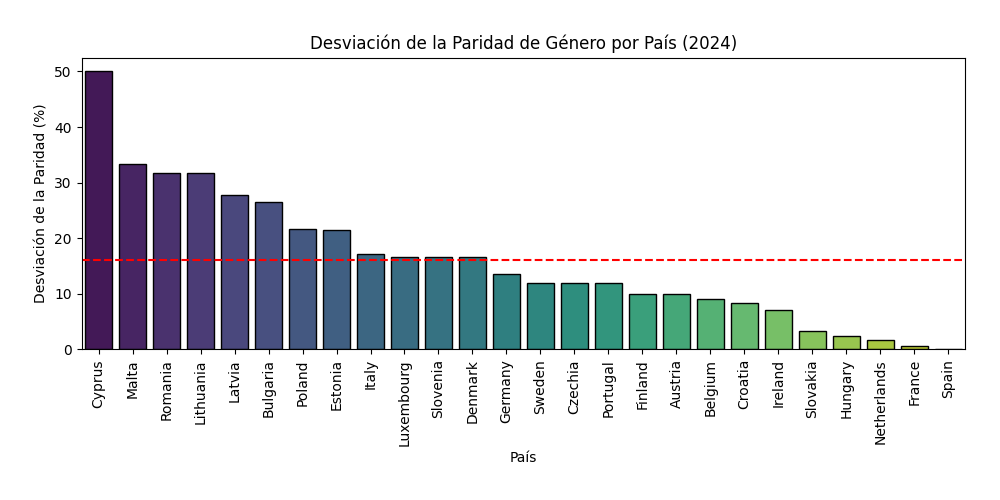

In [ ]:
from IPython.display import Image
Image('/content/barplot_parity_country.png', width=990)

b) Analizando el boxplot podemos observar:

Desigualdad Moderada con Algunos Países Atípicos: La mayoría de los países tienen una desviación de la paridad entre 10% y 30%, lo que indica que existe desigualdad de género, pero no es extremadamente alta para la mayoría. Sin embargo, el outlier cerca del 50% (caso de Chipre) sugiere que hay un país que se desvía considerablemente de la paridad, lo que puede indicar una situación de desigualdad de género muy pronunciada en ese país.
Mediana por Debajo de la Media: Si comparamos la mediana con el valor del outlier, parece que la distribución está sesgada hacia países con menores desviaciones, pero con algunos países que arrastran la media hacia arriba debido a sus valores extremos.

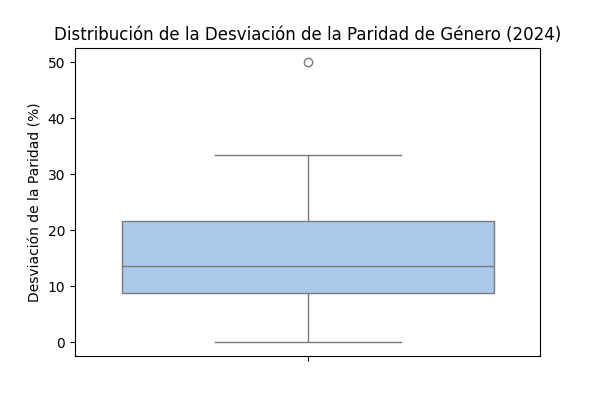

In [ ]:
from IPython.display import Image
Image('/content/boxplot_parity.png', width=580)

> c) En el Histograma, represento en el eje x el % de desviación de la paridad y en el eje Y el número de países incluidos en cada categoría, y observamos nuevamente que la distribución es asimétrica, con una mayor concentración de países con desviaciones de paridad entre 0% y 20%, aunque se observa una asimetría positiva en la forma de la distribución lo que sugiere que aunque la mayoría de los países están cerca de la paridad, hay algunos con desviaciones muy altas que afectan la media.

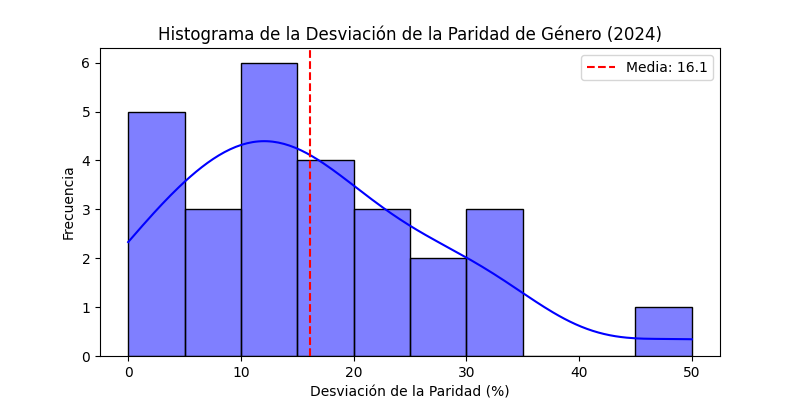

In [ ]:
from IPython.display import Image
Image('/content/histograma_parity.png', width=780)

Si lo representamos ahora con un gráfico de barras agrupadas con barras de error:
*  Las barras magenta representan la desviación media de la paridad para las mujeres en cada año electoral, mientras que las barras azules representan la misma métrica para los hombres.
En todos los años, las barras azules (hombres) son significativamente más altas que las barras magenta (mujeres), lo que indica que en promedio, los hombres han estado sobrerrepresentados en comparación con la paridad perfecta del 50%.

*  La magnitud de la desviación varía ligeramente entre los años, el patrón general de mayor desviación para los hombres y menor para las mujeres se mantiene constante en todos los períodos electorales.

*  El gráfico evidencia una persistente desigualdad de género en las elecciones europeas, con una representación significativamente mayor de hombres en comparación con las mujeres. Esto refleja un desbalance que se ha mantenido constante a lo largo de varias décadas.


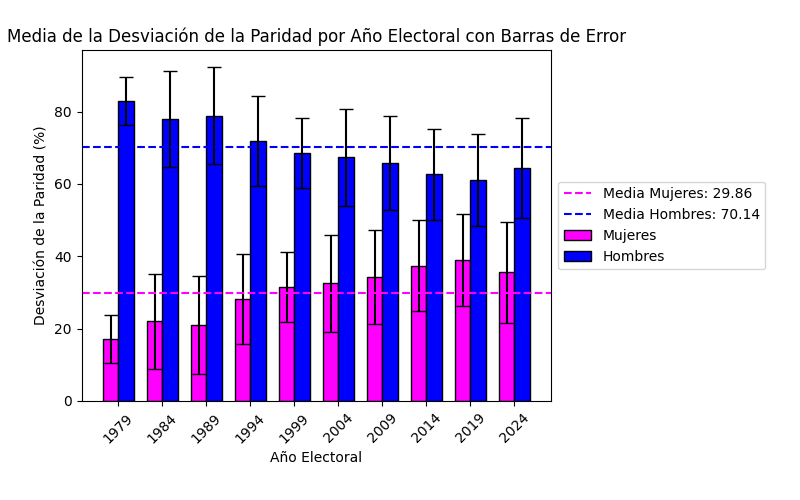

In [ ]:
from IPython.display import Image
Image('/content/media_desviacion_paridad_género.png', width=880)

##**3.2 Paridad de género en las últimas elecciones y su evolución histórica**

Tomando los datos de las últimas elecciones celebradas en 2024, vamos a representar ahora en un gráfico de tarta, que nos permita ver cúal ha sido el resultado de la representación de hombres y mujeres en el Parlamento europeo:, en donde se observa la mayor representación de hombres frente a las mujeres.

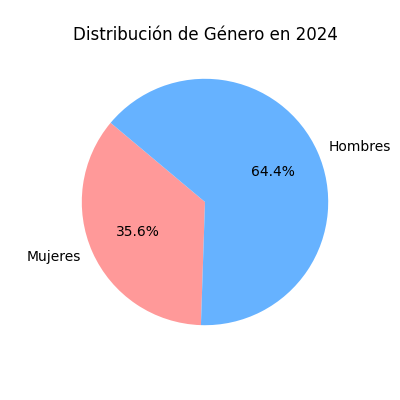

In [ ]:
from IPython.display import Image
Image('/content/piechart_gender_2024.png', width=400)

Si ampliamos ahora el foco, fijándonos en la distribución de representación  de países, vemos que la distribución de la representación de mujeres y hombres, varía mucho en los ditintos países, con países como España que presentaron listas paritarias (50%), o con Chipre que tenía el 100% de hombres en sus listas.
Destacan los casos de Suecia y Finlandia, que son los únicos países con mayor represntación de mujeres que de hombres en sus listas.

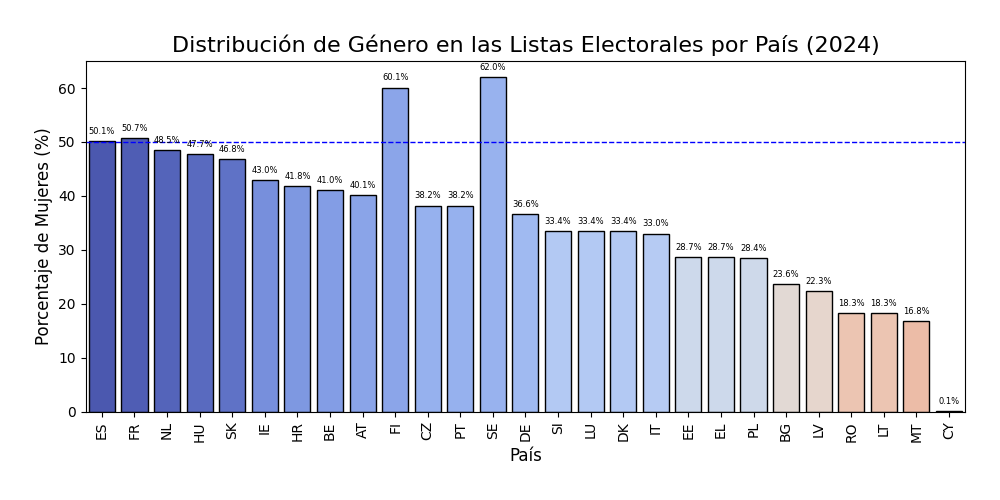

In [ ]:
from IPython.display import Image
Image('/content/barplot_gender_country_2024.png', width=840)

Por último, si nos concentramos en ver la evolución de la paridad de género desde las primeras elecciones europeas de 1979, podemos observar la tendencia creciente de la representación femenina en el Parlamento europeo, especialmente desde 1994.Esa tendencia es fruto de los esfuerzos por alcanzar la paridad de géneroen la política europea, aunque como vemos, todavía quedan desafíos para alcanzar una paridad plena.

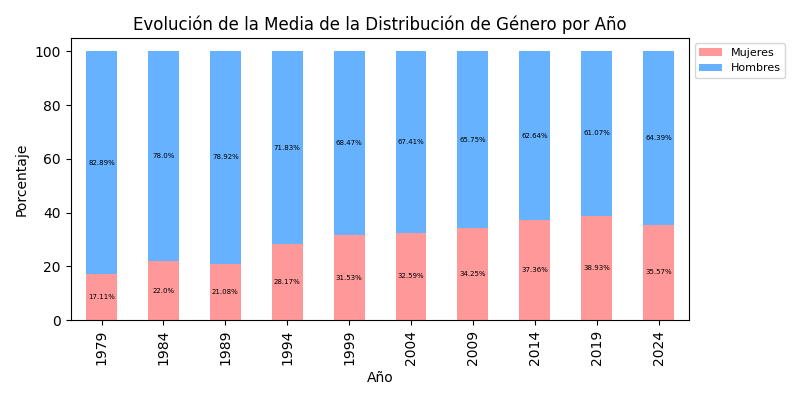

In [ ]:
from IPython.display import Image
Image('/content/barplot_gender_evolution.png', width=800)

# **4.Análisis de los resultados electorales**

## **4.1.Estructura del Parlamento Europeo**
Vamos a analizar cómo ha variado la composición del Parlamento Europeo desde las últimas elecciones de 2019 a las recientemente celebradas en 2024. Para ello, vamos a elaborar una serie de gráficos, en donde podemos observar la variación de escaños que ha tenido el Parlamento Europeo, y cómo se ha distribuido en los distintos países.
En este primer gráfico representamos la variación de diputados que ha tenido cada país. Lo primero que observamos es que el número total de diputados ha pasado de 705 en 2019 a 720 en 2024, ya que según las normas del Parlamento Europeo, la distribución de escaños se revisa para adecuarla a la evolución de la población de cada país:

*   Alemania se mantiene con el mismo número de escaños en ambas elecciones (96), siendo el país con más representación.
*   Francia incrementa su número de escaños de 79 en 2019 a 81 en 2024.
*   España y Italia también presentan aumentos en el número de escaños.
*   Algunos países como Polonia y Rumanía no experimentan cambios significativos en su representación (barras azules), mientras que otros como Bulgaria y Eslovaquia disminuyen en número de escaños (barras rojas).

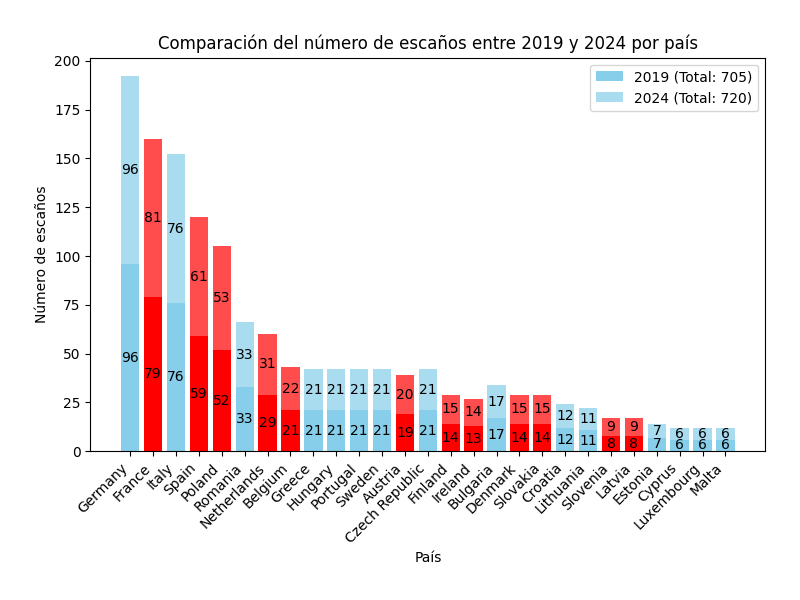

In [ ]:
from IPython.display import Image
Image('/content/barplot_eurodiputados.png', width=800)

A continuación he elaborado un gráfico interactivo en donde se muestra esta información, a través del mapa de Europa, de forma que al seleccionar el país, se muestra el total de escaños, la bandera del país seleccionado y la variación del número de escaños respecto a las elecciones de 2019

##**4.2.Resultados de las elecciones europeas en España**

En este apartado, vamos a analizar los resultados obtenidos por los distintos partidos que se presentaban a las elecciones europeas de 2024, y establecer la comparación con los resultados de 2019. Las elecciones europeas determinan como circunscripción única el país,de ahí que muchos partidos nacionalistas tengan que integrarse en coaliciones para poder asegurarse una representación en el Parlamento europeo. Adicionalmente esos partidos o coaliciones se integran en los grupos parlamentarios europeos.
Para ello, vamos a elaborar con "ggparliament", en forma de hemiciclo, que nos permita comparar la representación obtenida por lso distintos partidos en 2019 y 2024

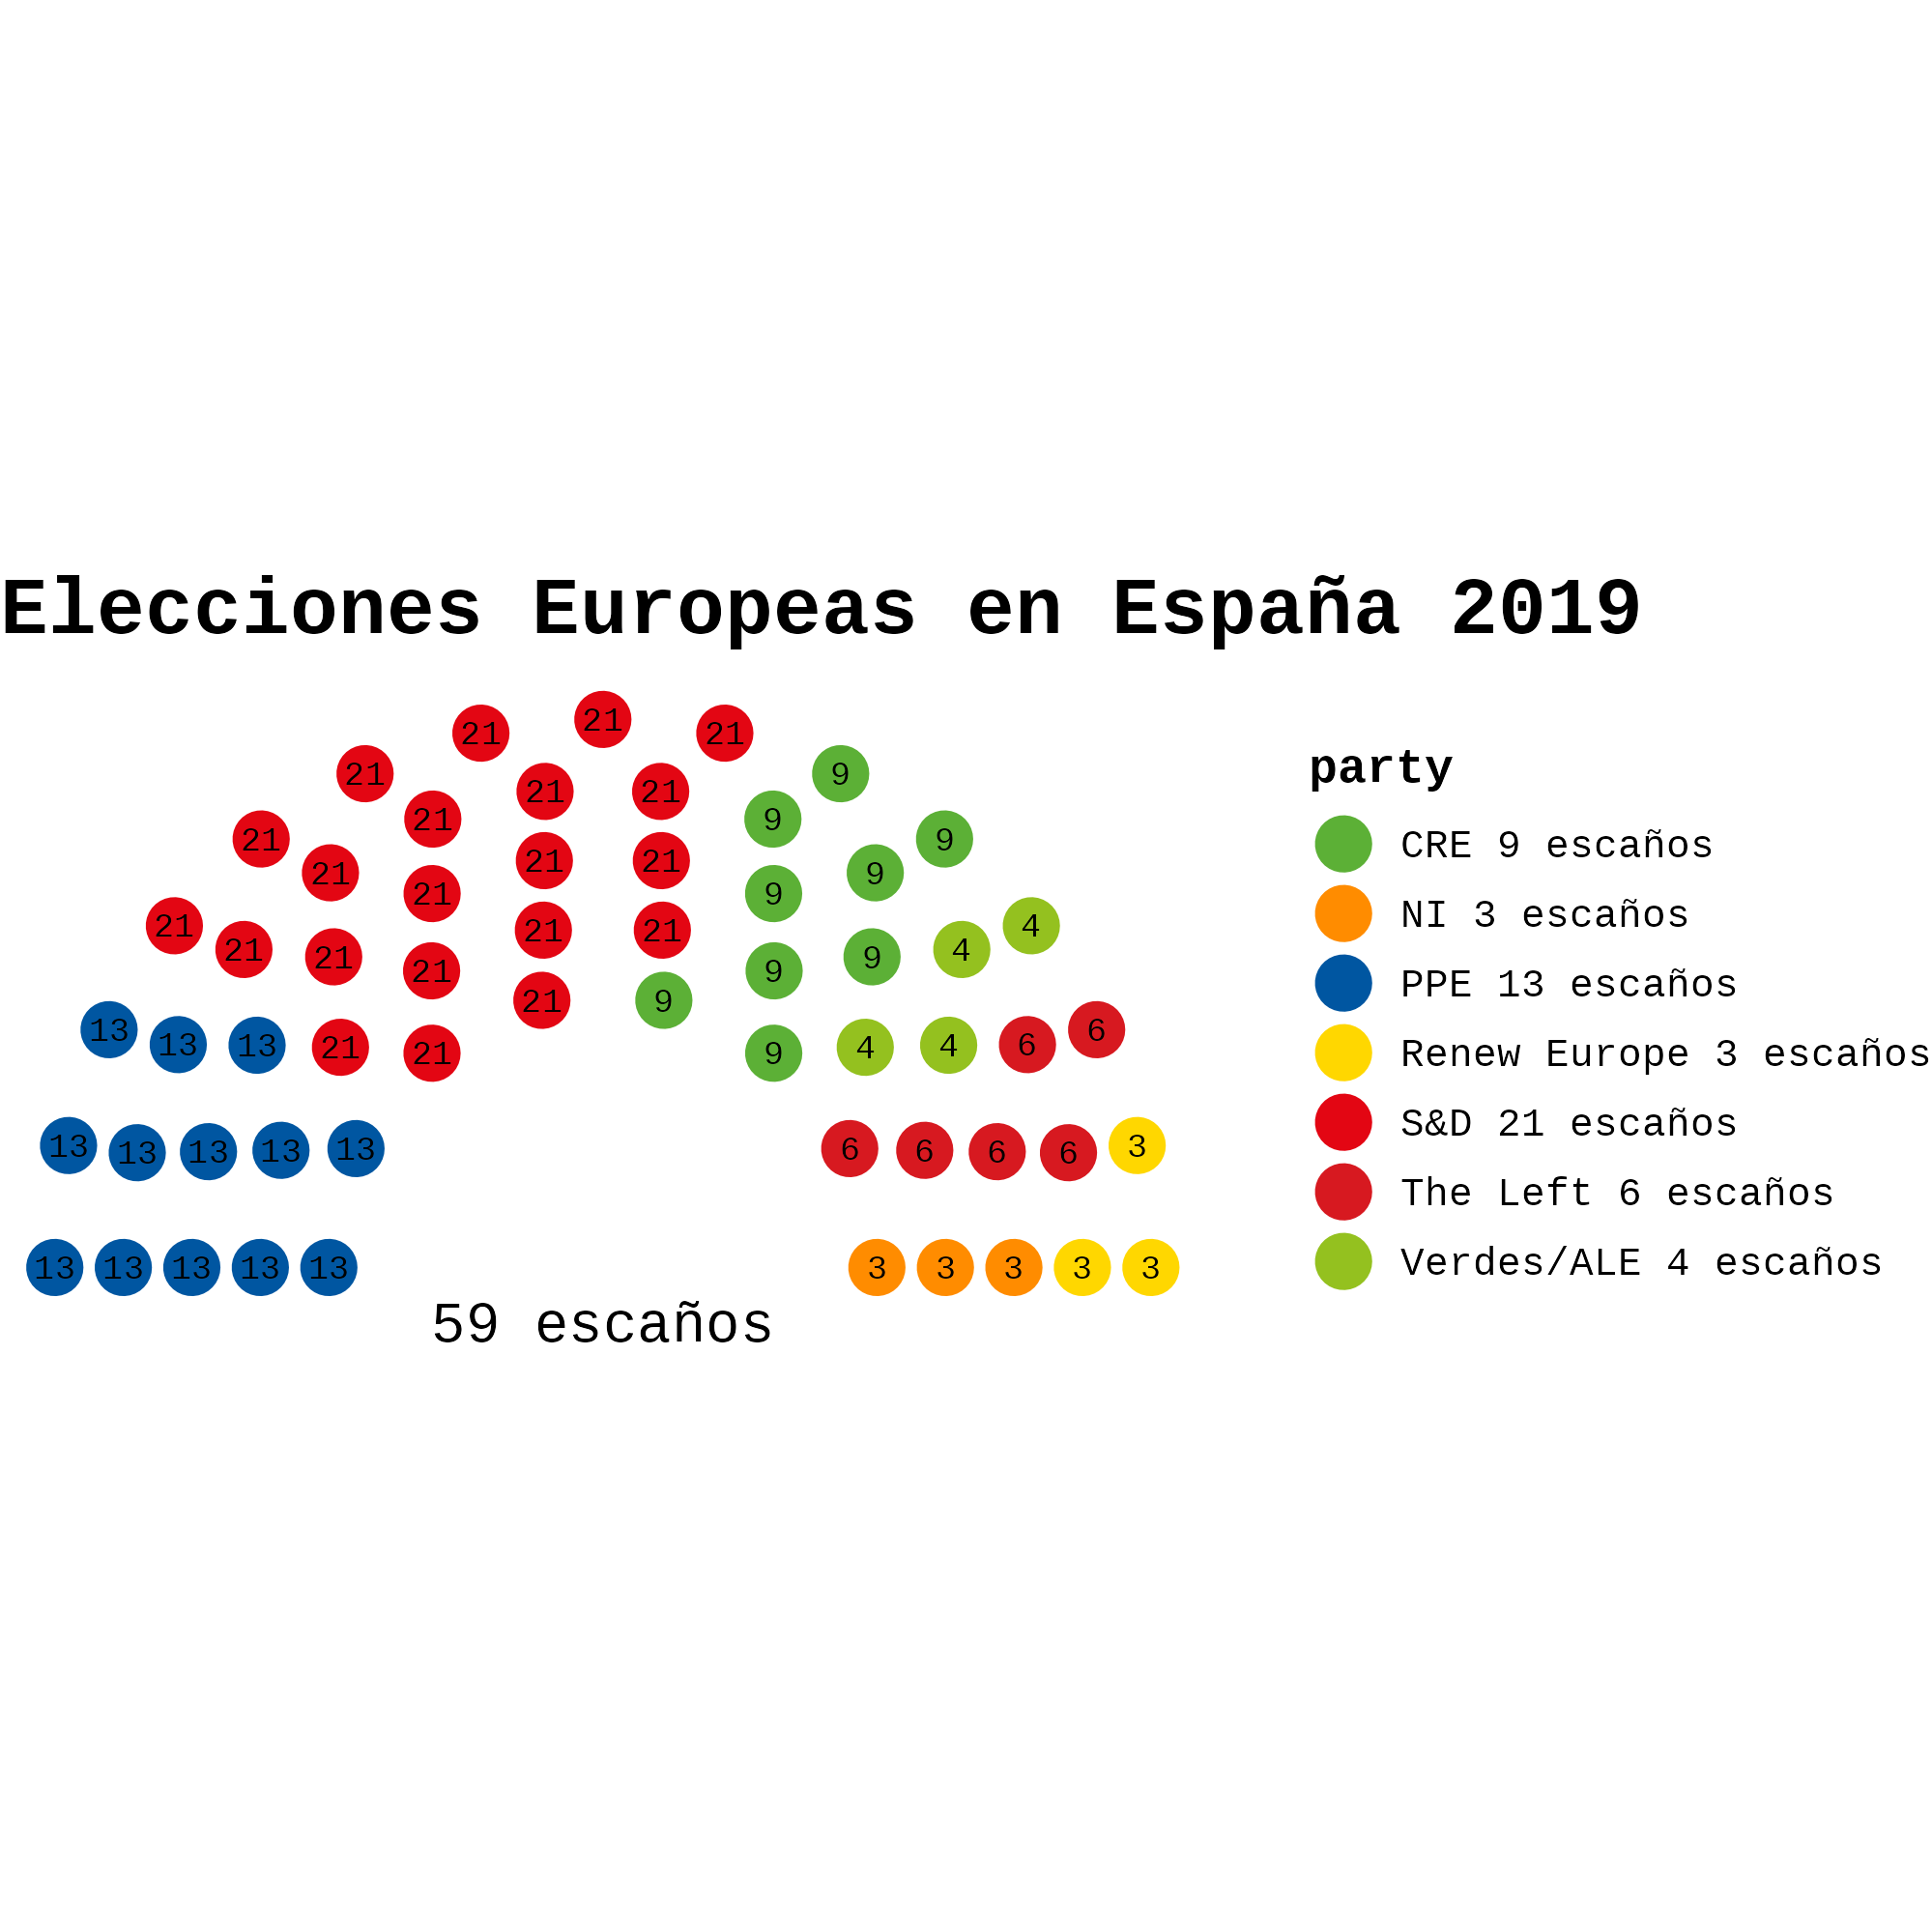

In [ ]:
from IPython.display import Image
Image('/content/hemiciclo_2019.png', width=400)

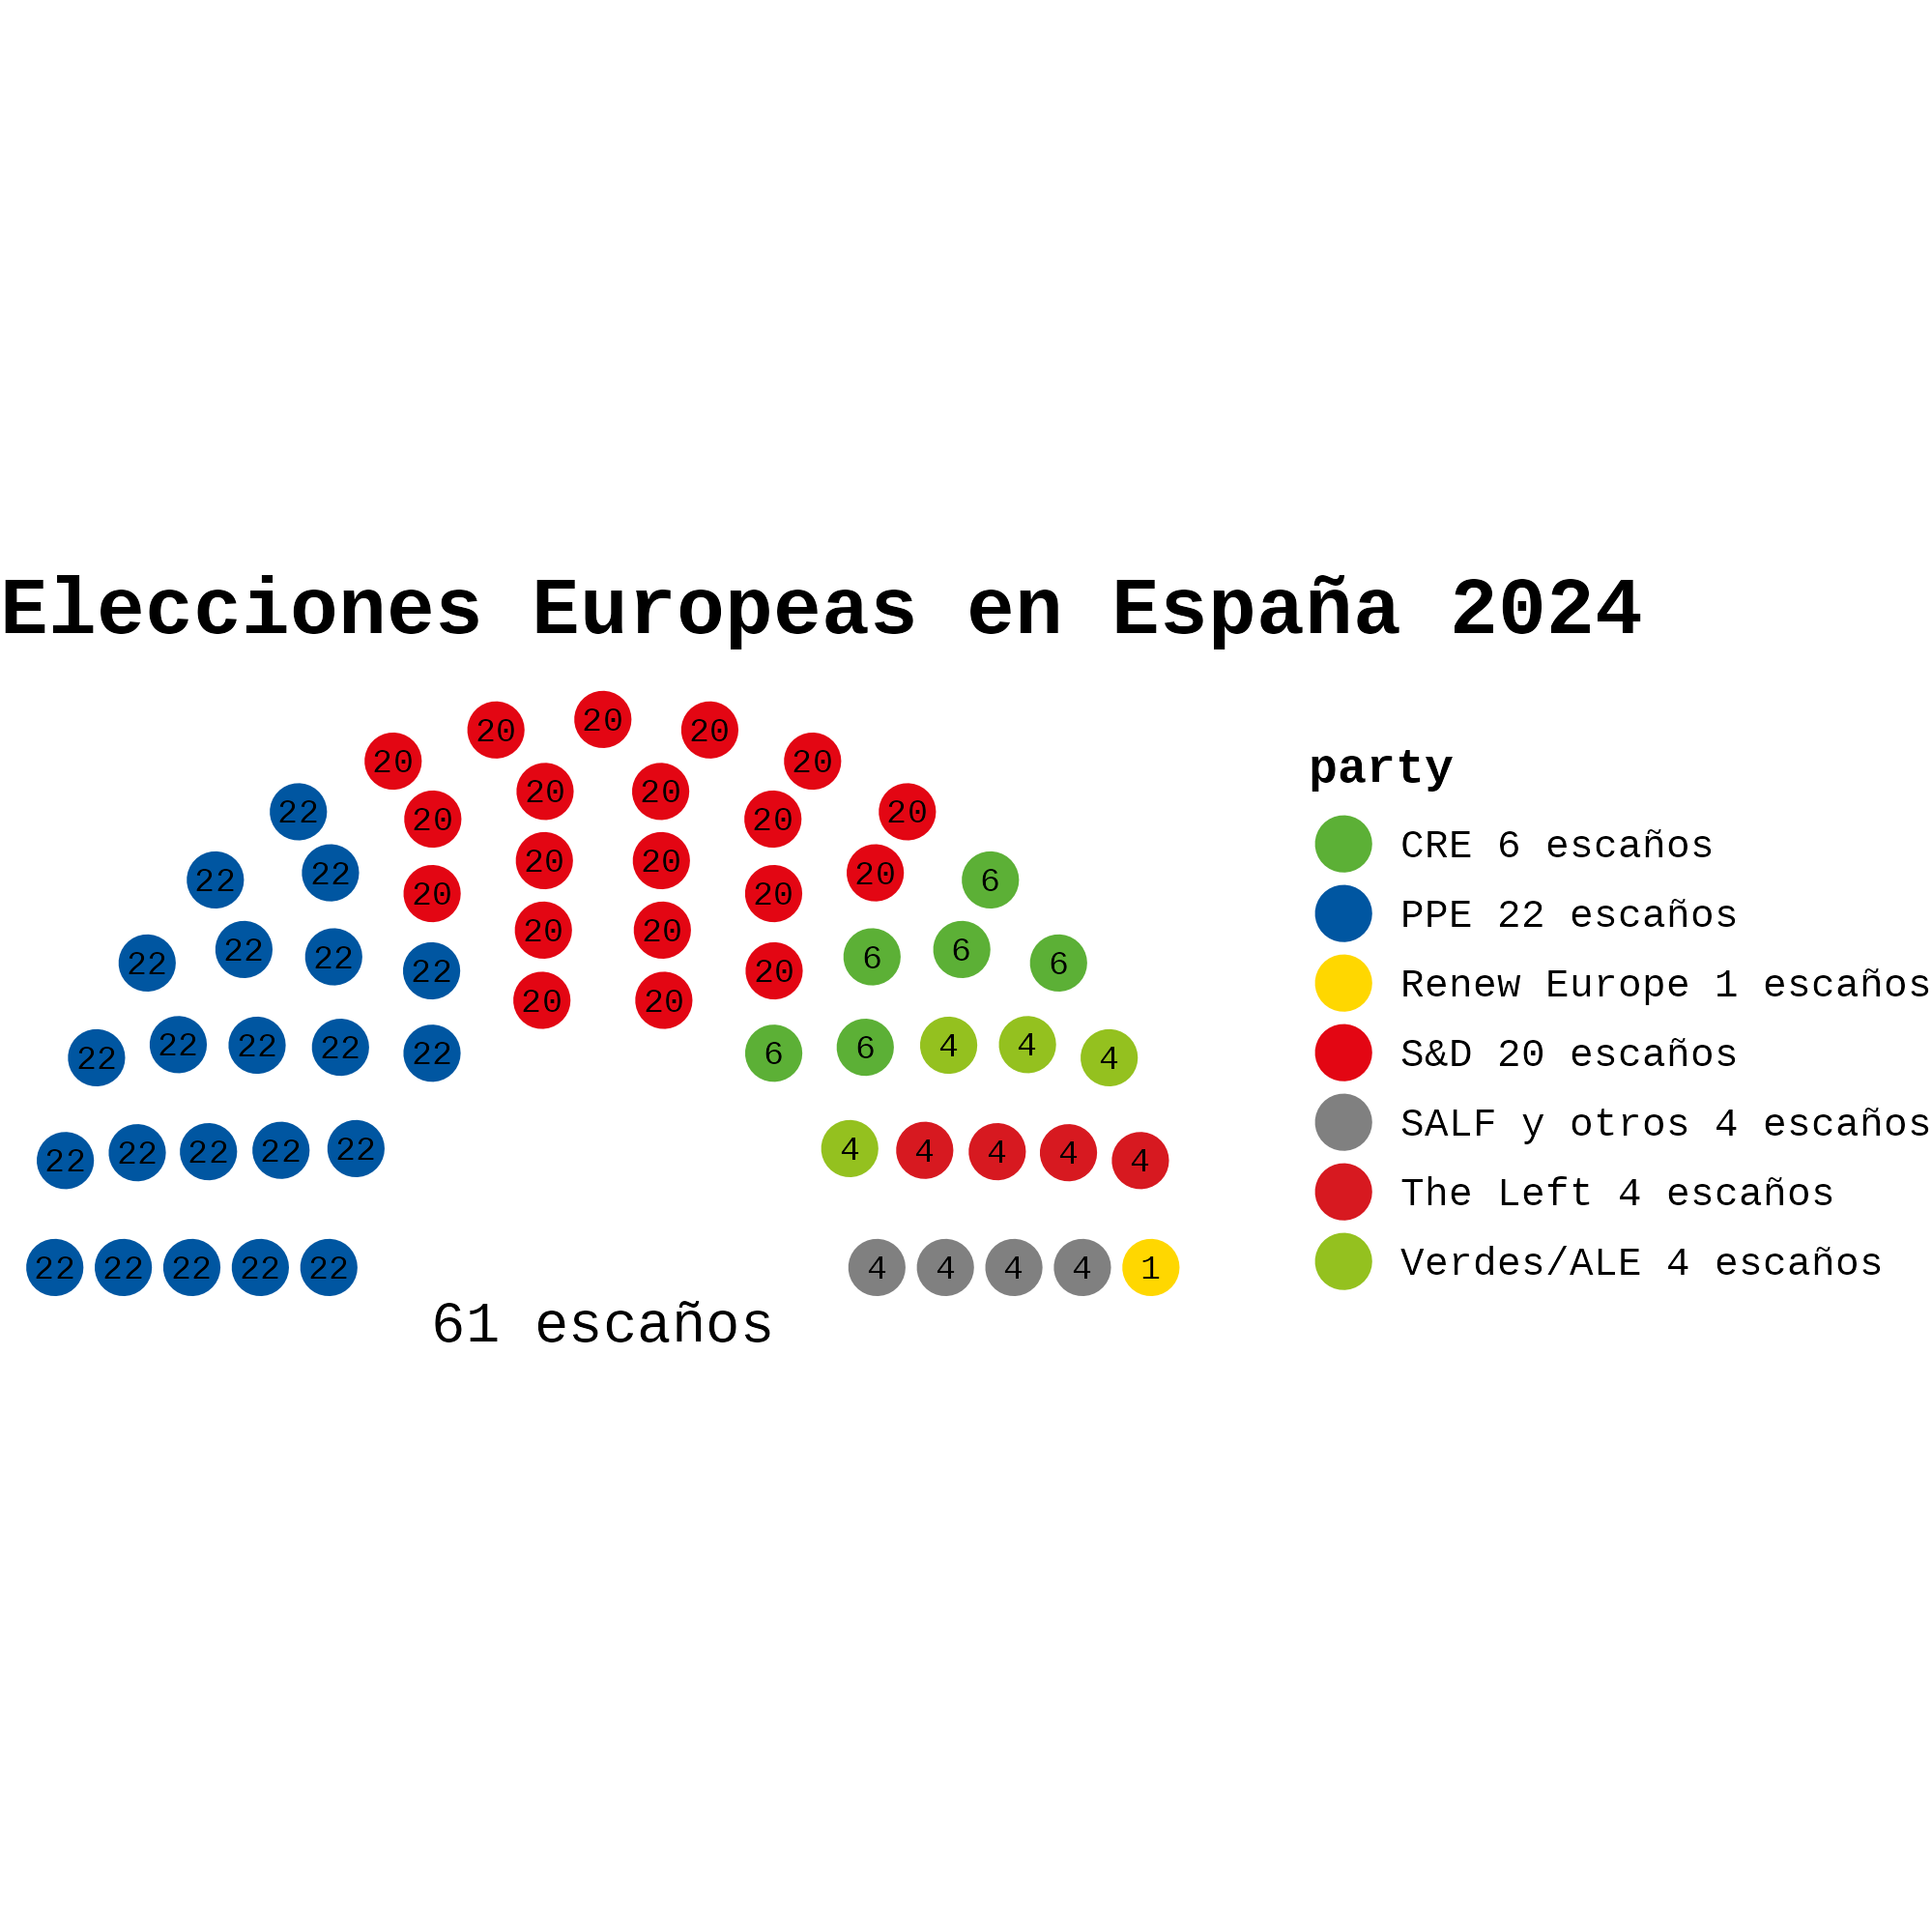

In [ ]:
from IPython.display import Image
Image('/content/hemiciclo_2024.png', width=400)

Si hacemos la comparación de los resultados electorales de los partidos políticos y coaliciones que se prsentaron en España en las dos últimas elecciones, podemos destacar la victoria del Partido Popular en 2024, que obtuvo 22 europarlamentarios frente a los 13 obtenidos en 2019, y el buen resultado cosechado por el PSOE, que únicmante pierde un diputado respecto a las elecciones de 2019.
Reslata el descenso de VOX que pierde 3 diputados, mientras en el resto de Europa los partidos de la ultraderecha cosechaban buenos resultados, y la aparición de nuevas formaciones como " Se acabó la Fiesta"(SALF), que consigue 4 eurodiputados.


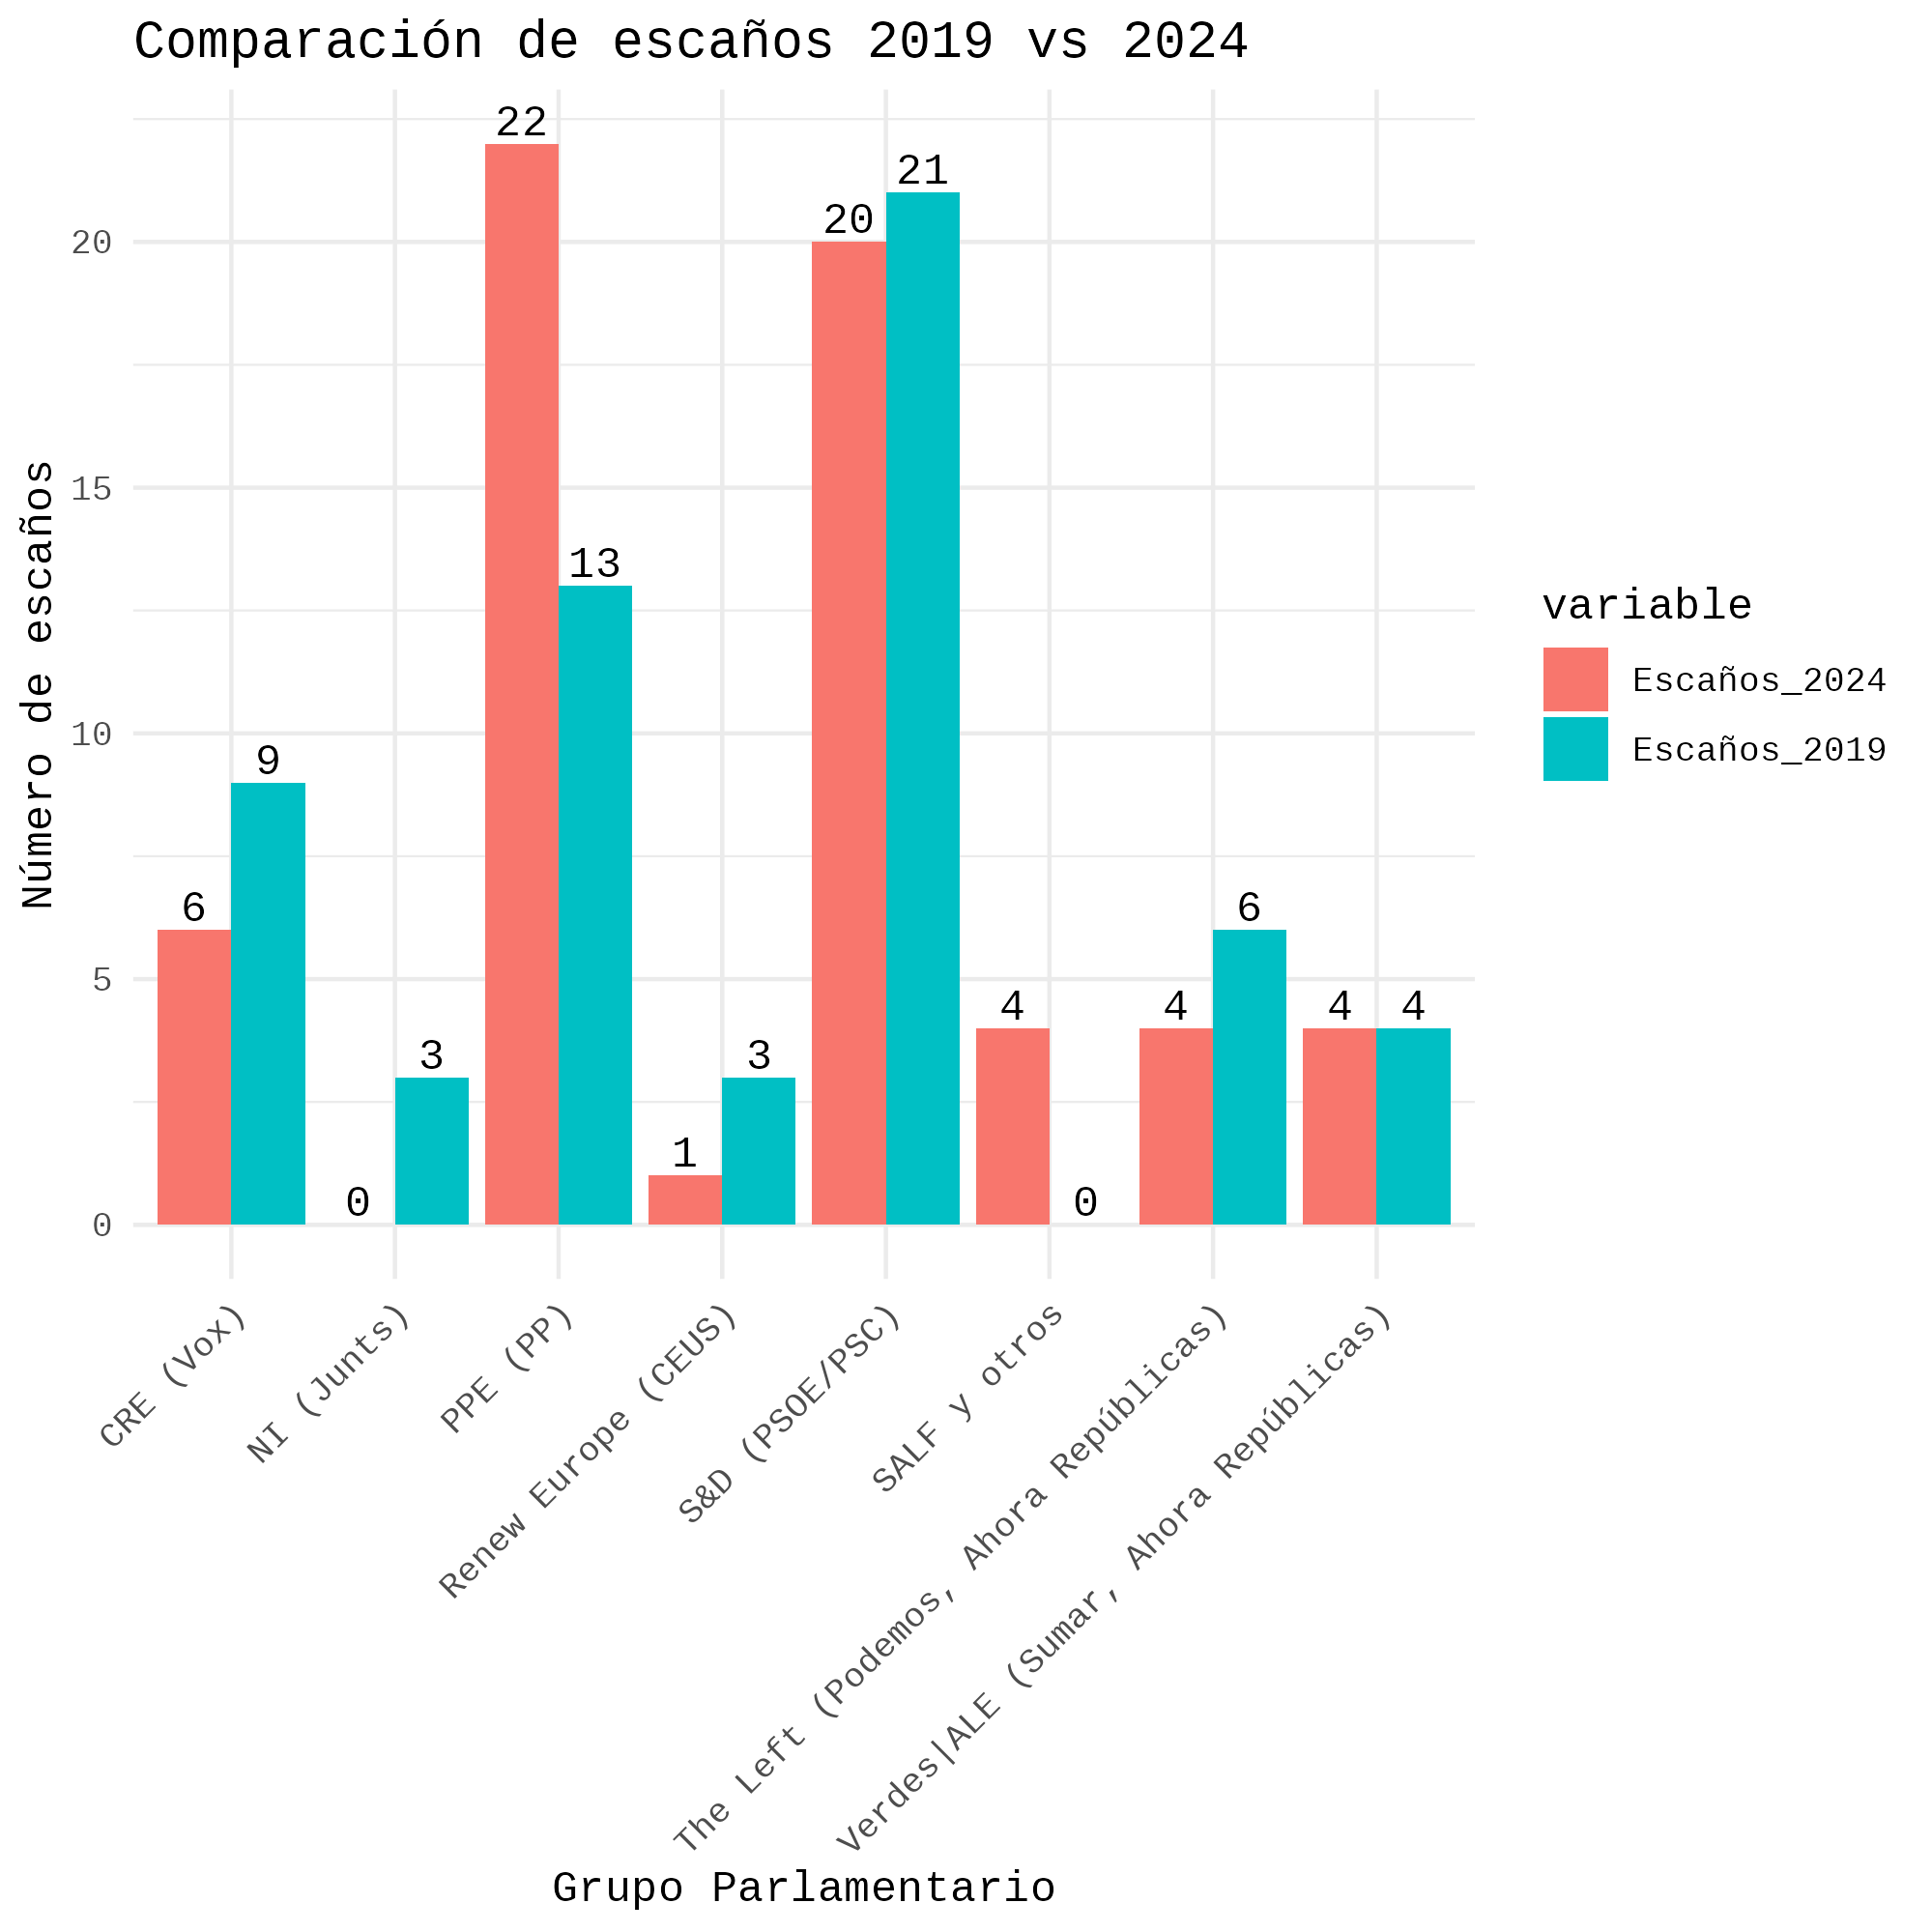

In [ ]:
from IPython.display import Image
Image('/content/comparacion_escanos_2019_2024.png', width=400)

# **Conclusiones**
El análisis de los resultados de las elecciones europeas de 2019 y 2024 en España no solo muestra una redistribución significativa de escaños entre los principales grupos parlamentarios, sino que también destaca aspectos clave como la participación electoral y la paridad de género en la representación.

Participación Electoral:

---


•	Tendencia general decreciente: desde la primera de las elecciones europeas en 1979, se observa una caída sostenida en la participación electoral, hecho que pone de manifiesto la creciente desafección ciudadana hacia la política de la Unión Europea.

•	Contrasta la situación de países como Bélgica y Luxemburgo, donde el voto es obligatorio y la participación es más elevada, con otros con participación más baja como Croacia y Lituania, recientemente incorporados a la Unión Europea.

•	En 2024 se produce una leve recuperación de la participación electoral, vinculado al auge de nuevos movimientos políticos de diversa índole política, que han conseguido movilizar el voto de los más jóvenes.


Paridad de Género:

---

•	Desigualdad persistente: a pesar de las mejoras continuadas reforzando la presencia de la mujer en el Parlamento europeo, los resultados muestran lo lejano que se encuentra la paridad de género; países como Chipre, siguen teniendo el 100% de los representantes masculinos; no obstante, la tendencia desde la década de los 90 es positiva.

•	Francia y España han conseguido la paridad de género en las últimas elecciones de 2024, probablemente por la implantación de políticas de cuotas que han dado sus resultados a favor de la paridad en la representación electoral.

Resultados electorales en España:

---

•	 Redistribución de escaños en España en 2024: el vuelco electoral del Partido Popular, proclamándose vencedor con 22 diputados, contrasta con el buen resultado obtenido por el Partido Socialista, que, con 20 diputados, mantiene un buen resultado comparado con el obtenido en 2019. Ese crecimiento del Partido Popular se produce a costa del declive de VOX que empeora sus resultados, cuando en el resto de Europa el avance de la ultraderecha ha sido notable.

•	 La aparición de nuevos partidos como “Se acabó la fiesta” (SALF) que ha conseguido 4 eurodiputados, pone de manifiesto el interés de parte del electorado más joven en nuevas opciones políticas, que busca nuevas soluciones a los problemas políticos.


La visualización de estos datos a través de gráficos de barras y análisis de la composición de género refuerza la necesidad de seguir trabajando en políticas que promuevan la igualdad de género en las listas electorales y en la representación política.


# **Anexos**

En esta sección se presenta el código utilizado para preparar los datos y generar las visualizaciones de los gráficos incluidos en este trabajo.

## Anexos Sección 2: Análisis de los datos de participación electoral en las elecciones europeas

### **Anexo 1**: Instalación de programas necesarios para la ejecución del código

Para la correcta ejecución de los análisis y gráficos presentados en este trabajo, he utilizado **Google Colab** como entorno de trabajo. En este entorno, algunas librerías de Python ya están preinstaladas, pero he necesitado instalar algunas adicionales, como la librería **R** `ggparliament`, que no está disponible en CRAN desde mayo, por lo que tuve que descargarla desde un archivo externo.

El siguiente código instala **rpy2**, que permite ejecutar código **R** dentro de un entorno Python en Colab, cargando la extensión de **rpy2** en Jupyter/Colab:
```python
!pip install rpy2 > /dev/null 2>&1
# Cargar la extensión de rpy2 en Jupyter/Colab
%load_ext rpy2.ipython
```
A continuación descargamos los programas que necesitamos de R con sus librerías:
```R
%%R
install.packages("httr",quiet=TRUE)
install.packages("readr",quiet=TRUE)
install.packages("tidyverse", quiet=TRUE)
install.packages("ggplot2", quiet=TRUE)
install.packages("leaflet", quiet=TRUE)
install.packages("reshape2", quiet=TRUE)
install.packages("gridExtra", quiet=TRUE)
install.packages("cowplot",quiet=TRUE)
suppressWarnings(suppressMessages({
  library(httr)
  library(readr)
  library(tidyverse)
  library(ggplot2)
  library(leaflet)
  library(reshape2)
  library(gridExtra)
  library(cowplot)
}))
```
Cargamos el programa de "ggparliament" desde el repositorio de CRAN, buscando en el archivo, ya que desde mayo no está disponible:
```python
import rpy2.robjects as ro
!wget https://cran.r-project.org/src/contrib/Archive/ggparliament/ggparliament_2.0.0.tar.gz > /dev/null 2>&1
ro.r('suppressWarnings(suppressMessages(install.packages("ggparliament_2.0.0.tar.gz", repos = NULL, type = "source")))')
ro.r('suppressWarnings(suppressMessages(library(ggparliament)))')
```
A continuación procedemos con la descarga de los archivos que vamos a necesitar para realizar nuestro análisis:
```python
!wget -O turnout_data.csv 'https://results.elections.europa.eu/data-sheets/csv/turnout/turnout-eu.csv' > /dev/null 2>&1
!wget -O turnout-country.csv 'https://results.elections.europa.eu/data-sheets/csv/turnout/turnout-country.csv' > /dev/null 2>&1
!wget -O groups.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/groups.csv' > /dev/null 2>&1
!wget -O parties.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/parties.csv' > /dev/null 2>&1
!wget -O results-parties-es.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/results-parties/results-parties-es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-groups-es.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/seats-breakdown-groups/es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-parties-es_2024.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/seats-breakdown-parties/es.csv' > /dev/null 2>&1
!wget -O seats-breakdown-parties-es_2019.csv 'https://results.elections.europa.eu/data-sheets/csv/2019-2024/election-results/seats-breakdown-parties/es.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1979-1984.csv 'https://results.elections.europa.eu/data-sheets/csv/1979-1984/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1984-1989.csv 'https://results.elections.europa.eu/data-sheets/csv/1984-1989/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1989-1994.csv 'https://results.elections.europa.eu/data-sheets/csv/1989-1994/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1994-1999.csv 'https://results.elections.europa.eu/data-sheets/csv/1994-1999/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-1999-2004.csv 'https://results.elections.europa.eu/data-sheets/csv/1999-2004/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2004-2009.csv 'https://results.elections.europa.eu/data-sheets/csv/2004-2009/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2009-2014.csv 'https://results.elections.europa.eu/data-sheets/csv/2009-2014/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2014-2019.csv 'https://results.elections.europa.eu/data-sheets/csv/2014-2019/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2019-2024.csv 'https://results.elections.europa.eu/data-sheets/csv/2019-2024/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
!wget -O gender-balance-country-2024-2029.csv 'https://results.elections.europa.eu/data-sheets/csv/2024-2029/election-results/gender-balance/gender-balance-country.csv' > /dev/null 2>&1
```
Para preparar el análisis posterior sobre la paridad de género de las listas
de los países que conforman la Unión Europea, vamos a combinar los ficheros de
las elecciones en un único dataframe, para facilitar los cálculos posteriores:
```python
import pandas as pd
import re
files = [
    'gender-balance-country-1979-1984.csv',
    'gender-balance-country-1984-1989.csv',
    'gender-balance-country-1989-1994.csv',
    'gender-balance-country-1994-1999.csv',
    'gender-balance-country-1999-2004.csv',
    'gender-balance-country-2004-2009.csv',
    'gender-balance-country-2009-2014.csv',
    'gender-balance-country-2014-2019.csv',
    'gender-balance-country-2019-2024.csv',
    'gender-balance-country-2024-2029.csv',
]
dataframes = []
# Expresión regular para encontrar el primer año en el nombre del archivo
year_pattern = re.compile(r'(\d{4})-\d{4}')
# Procesar cada archivo
for filepath in files:
    try:
        filename = filepath.split('/')[-1]
        match = year_pattern.search(filename)
        if match:
            year = int(match.group(1))
            df = pd.read_csv(filepath, sep=';')
            df['Year'] = year
            dataframes.append(df)
        else:
            raise ValueError("No se pudo encontrar un año en el nombre del archivo.")
    except Exception as e:
        print(f"No se pudo procesar el archivo {filename}: {e}")
# Combinar todos los DataFrames en uno solo
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Mostrar la estructura del DataFrame combinado
    print(combined_df.info())
else:
    print("No se pudieron concatenar los DataFrames.")
```
### **Anexo 2**: Resultado del DataFrame Combinado

A continuación se muestran las primeras filas del DataFrame combinado que contiene los datos de paridad de género de las elecciones entre 1979 y 2029.

| COUNTRY_ID | MEN  | WOMEN | UPDATE_STATUS | UPDATE_TIME | Year |
|------------|------|-------|---------------|-------------|------|
| Austria    | 10.0 | 12.0  | Up-to-date    | 2023-01-01  | 1979 |
| Belgium    | 15.0 | 10.0  | Up-to-date    | 2023-01-02  | 1979 |
| Bulgaria   | 12.0 | 9.0   | Up-to-date    | 2023-01-03  | 1979 |
| Croatia    | 11.0 | 11.0  | Up-to-date    | 2023-01-04  | 1979 |
| Cyprus     | 5.0  | 6.0   | Up-to-date    | 2023-01-05  | 1979 |


Procedemos a leer el resto de archivos descargados:
```R  
%%R
turnout_country <- read.csv('turnout-country.csv', sep = ";")
turnout_eu <- read.csv('turnout_data.csv', sep = ";")
groups <- read.csv('groups.csv', sep = ";")
parties <- read.csv('parties.csv', sep = ";")
results_parties_es <- read.csv('results-parties-es.csv', sep = ";")
seats_breakdown_groups_es <- read.csv('seats-breakdown-groups-es.csv', sep = ";")
seats_breakdown_parties_es_2024 <- read.csv('seats-breakdown-parties-es_2024.csv', sep = ";")
seats_breakdown_parties_es_2019 <- read.csv('seats-breakdown-parties-es_2019.csv', sep = ";")
```
### **Anexo 3**:Filtro de años de elecciones y cálculo de la media y desviación estándar de la tasa participación
```R
%%R
# Filtrar solo los años de elecciones europeas
valid_years <- c(1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024)
turnout_filtered <- turnout_country %>%
  filter(YEAR %in% valid_years)
# Agrupar por año y calcular la media y desviación estándar de la tasa de participación con dos decimales
turnout_summary_filtered <- turnout_filtered %>%
  group_by(YEAR) %>%
  summarise(
    mean_rate = round(mean(RATE, na.rm = TRUE), 2),
    sd_rate = round(sd(RATE, na.rm = TRUE), 2)
  )
# Mostrar el resumen
print(turnout_summary_filtered)
```
### Resultado:

| Año  | Media Participación (%) | Desviación Estándar (%) |
|------|-------------------------|-------------------------|
| 1979 | 66.0                    | 19.7                    |
| 1984 | 64.1                    | 20.2                    |
| 1989 | 62.9                    | 18.2                    |
| 1994 | 58.5                    | 19.5                    |
| 1999 | 52.4                    | 20.2                    |
| 2004 | 47.8                    | 20.4                    |
| 2009 | 46.2                    | 19.0                    |
| 2014 | 43.3                    | 18.4                    |
| 2019 | 48.8                    | 16.6                    |
| 2024 | 48.8                    | 15.8                    |

Ahora creamos las visualizaciones con estos datos, primero un gráfico de bigotes para ver la distribución de la tasa de participación por año:
### **Anexo 4**: Boxplot de la distribución de la tasa de participación por año
```R
%%R
# Gráfico 1 de bigotes (boxplot) para visualizar la distribución de la tasa de participación por año
p <- ggplot(turnout_filtered, aes(x = as.factor(YEAR), y = RATE)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(
    title = "Distribución de la Tasa de Participación por Año",
    x = "Año Electoral",
    y = "Tasa de Participación (%)"
  ) +
  theme_minimal()
# Mostrar el gráfico
print(p)
# Guardar el gráfico como PNG
ggsave("boxplot_turnout.png", plot = p)
```
### **Anexo 5**: Histograma de la Tasa de Participación por Año
```R
# Gráfico 2 de bigotes (boxplot) para visualizar la distribución de la tasa de participación por año
%%R
p<-ggplot(turnout_filtered, aes(x = RATE, fill = as.factor(YEAR))) +
  geom_histogram(binwidth = 10, color = "black", alpha = 0.7) +
  facet_wrap(~ YEAR, ncol = 1, scales = "free_y") +
  scale_fill_manual(values = rainbow(length(unique(turnout_filtered$YEAR)))) +
  scale_y_log10() +
  labs(
    title = "Histograma de la Tasa de Participación por Año",
    x = "Tasa de Participación (%)",
    y = "Número de Países (Escala Logarítmica)"
  ) +
  theme_minimal() +
  theme(
    text = element_text(size = 10),
    axis.text.y = element_text(size = 8, hjust = 1, angle = 45),
    plot.margin = margin(20, 20, 20, 10)
  ) +
  theme(panel.spacing.y = unit(0.5, "lines"))
ggsave("histograma_turnout.png", plot = p)
print(p)
```
### **Anexo 6**: Gráfico de barras con error bars usando la media y la desviación estándar
```R
%%R
# Gráfico 3 de barras con error bars usando la media y desviación estándar
p <- ggplot(turnout_summary_filtered, aes(x = as.factor(YEAR), y = mean_rate)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_errorbar(aes(ymin = mean_rate - sd_rate, ymax = mean_rate + sd_rate), width = 0.2) +
  labs(
    title = "Media de la Tasa de Participación por Año con Desviación Estándar",
    x = "Año Electoral",
    y = "Tasa de Participación (%)"
  ) +
  theme_minimal()
# Mostrar el gráfico
print(p)
# Guardar el gráfico como PNG
ggsave("barplot_turnout.png", plot = p)
```
### **Anexo 7**: Gráfico 4 con la evolución de la participación electoral
```R
%%R
# Identificar el año con la máxima y mínima participación electoral
max_participation <- turnout_summary_filtered %>% filter(mean_rate == max(mean_rate))
min_participation <- turnout_summary_filtered %>% filter(mean_rate == min(mean_rate))
# Mostrar los resultados
print(paste("Máxima participación:", max_participation$mean_rate, "en el año", max_participation$YEAR))
print(paste("Mínima participación:", min_participation$mean_rate, "en el año", min_participation$YEAR))
Resultado:
Máxima participación: 66.0% en el año 1979
Mínima participación: 43.3% en el año 2014
# Crear la columna PointType para identificar máximo, mínimo o ninguno
turnout_summary_filtered <- turnout_summary_filtered %>%
  mutate(PointType = case_when(
    mean_rate == max(mean_rate) ~ "Máximo",
    mean_rate == min(mean_rate) ~ "Mínimo",
    TRUE ~ "Ninguno"
  ))
# Crear el gráfico con la leyenda para máximo y mínimo
p<-ggplot(turnout_summary_filtered, aes(x = YEAR, y = mean_rate)) +
  geom_line(color = "blue", size = 1) +
  geom_point(aes(color = PointType), size = 4) +
  geom_errorbar(aes(ymin = mean_rate - sd_rate, ymax = mean_rate + sd_rate), width = 0.2, color = "gray") +
  geom_text(aes(label = round(mean_rate, 2)), vjust = -1, color = "black") +
  scale_x_continuous(breaks = turnout_summary_filtered$YEAR) +
  scale_color_manual(values = c("Máximo" = "green", "Mínimo" = "orange"), drop = TRUE) +
  labs(title = "Evolución de la Media de la Participación Electoral por Año",
       x = "Año",
       y = "Media de la Tasa de Participación (%)",
       color = "Participación Máxima y Mínima") +
  theme_minimal() +
  theme(panel.background = element_rect(fill = "white", color = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.1))
  ggsave("evolucion_turnout.png",plot=p)
print(p)
```
### **Anexo 8**: Preparación de cálculo de la participación media en la UE
```python
import pandas as pd
# Leer el archivo turnout-country.csv
turnout_df = pd.read_csv("turnout-country.csv", sep=";")
# Filtrar para el año 2024
turnout_2024 = turnout_df[turnout_df['YEAR'] == 2024]
# Calcular la participación media de la UE y redondearla a dos decimales
participacion_media_ue = round(turnout_2024['RATE'].mean(), 2)
# Crear un DataFrame para la participación media de la UE
ue_row = pd.DataFrame({
    'COUNTRY_ID': ['UE'],
    'RATE': [participacion_media_ue],
    'YEAR': [2024],
    'UPDATE_STATUS': ['FINAL'],
    'UPDATE_TIME': ['']
})
# Añadir la participación media de la UE al DataFrame original
turnout_2024 = pd.concat([turnout_2024, ue_row], ignore_index=True)
```
### **Anexo 9**: Añadir banderas de países para gráfico posterior interactivo
```python
import os  # Importar el módulo os para manejar los directorios
import requests  # Importar requests para descargar las banderas
import pandas as pd  # Importar pandas para manejar el DataFrame
# Lista de países y sus códigos
countries = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "CY": "Cyprus",
    "EE": "Estonia",
    "FI": "Finland",
    "FR": "France",
    "GR": "Greece",
    "HR": "Croatia",
    "HU": "Hungary",
    "IT": "Italy",
    "IE": "Ireland",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "MT": "Malta",
    "NL": "Netherlands",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "ES": "Spain",
    "SE": "Sweden",
}
# Base URL para descargar las banderas en formato PNG, 40x30 píxeles
base_url = "https://flagcdn.com/w40/"
# Carpeta donde guardar las banderas
output_folder = "flags/"
# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Lista para almacenar la información del DataFrame
data = []
# Descargar las banderas
for code, country in countries.items():
    url = f"{base_url}{code.lower()}.png"
    response = requests.get(url)
    if response.status_code == 200:
        file_path = f"{output_folder}{code.lower()}.png"
        with open(file_path, "wb") as f:
            f.write(response.content)
        # Añadir la información al DataFrame
        data.append({
            "COUNTRY_ID": code,
            "Country_Name": country,
            "Flag_Image": file_path
        })
    else:
        print(f"No se pudo descargar la bandera de {country}.")
# Crear el DataFrame con la información de los países y las banderas
country_info = pd.DataFrame(data)
```
### **Anexo 10**: Gráfico 5 Participación electoral media en la UE.
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
turnout_2024 = pd.DataFrame({
    'Country_Name': [
        'Belgium', 'Luxembourg', 'Malta', 'Germany', 'Hungary', 'Cyprus', 'Denmark', 'Austria', 'Sweden',
        'Romania', 'France', 'Ireland', 'European Union', 'Italy', 'Spain', 'Netherlands', 'Slovenia',
        'Poland', 'Finland', 'Estonia', 'Portugal', 'Czechia', 'Slovakia', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia'
    ],
    'RATE': [
        89.01, 82.29, 72.98, 67.74, 64.46, 58.86, 58.25, 56.25, 53.39, 52.4, 51.49, 48.8, 48.8,
        48.31, 46.39, 41.8, 41.24, 38.65, 35.24, 33.88, 30.64, 29.31, 27.1, 25.0, 22.43, 19.88, 17.5
    ]
})
turnout_2024['Color'] = ['#FF6347' if country == 'European Union' else '#1f77b4' for country in turnout_2024['Country_Name']]
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x='Country_Name',
    y='RATE',
    data=turnout_2024,
    palette=turnout_2024['Color'].tolist(),
    edgecolor='black'
)
for i, row in enumerate(turnout_2024.itertuples()):
    height = row.RATE
    barplot.text(i, height + 1, f"{height}%", ha="center", va='bottom', size=5, color="black")
plt.title('Participación en las Elecciones de 2024 por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Tasa de Participación (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('participacion_2024.png')
plt.show()
```
## Anexos Sección 3:Análisis de los datos de Paridad de Género
### **Anexo 12**: Cálculo del índice de paridad de género
```python
#El siguiente código calcula el índice de paridad para los datos del año 2024, donde la paridad perfecta sería 50% (hombres y mujeres representados equitativamente). Se calcula el valor absoluto de la diferencia entre el porcentaje de mujeres y el 50%, lo que nos da un Índice de Paridad.
df_2024 = combined_df[combined_df['Year'] == 2024].copy()
df_2024['Parity_Index'] = abs(df_2024['WOMEN'] - 50)  # Paridad perfecta sería 50%
print(df_2024.head())
    COUNTRY_ID    MEN  WOMEN UPDATE_STATUS       UPDATE_TIME  Year  \
169         BE  59.09  40.91  CONSTITUTIVE  2024-09-06 10:50  2024   
170         BG  76.47  23.53  CONSTITUTIVE  2024-09-06 10:50  2024   
171         CZ  61.90  38.10  CONSTITUTIVE  2024-09-06 10:50  2024   
172         DK  66.67  33.33  CONSTITUTIVE  2024-09-06 10:50  2024   
173         DE  62.50  36.46  CONSTITUTIVE  2024-09-06 10:50  2024   

     Parity_Index  
169          9.09  
170         26.47  
171         11.90  
172         16.67  
173         13.54  
```
### **Anexo 13**: Gráfico 6: Indice de Paridad de género por país
```python
df_2024.loc[:, 'Parity_Index'] = abs(df_2024['WOMEN'] - 50)
mean_parity = df_2024['Parity_Index'].mean()
std_parity = df_2024['Parity_Index'].std()
# Merge para obtener los nombres de los países
df_merged = df_2024.merge(country_info, on='COUNTRY_ID')
# país con la mayor desviación de la paridad
max_parity = df_merged.loc[df_merged['Parity_Index'].idxmax()]
# país con la menor desviación de la paridad
min_parity = df_merged.loc[df_merged['Parity_Index'].idxmin()]
# resultados mostrando el nombre del país
print(f"El país con mayor desviación de la paridad es: {max_parity['Country_Name']} ({max_parity['Parity_Index']}%)")
print(f"El país con menor desviación de la paridad es: {min_parity['Country_Name']} ({min_parity['Parity_Index']}%)")
# Gráfico de barras mostrando la desviación de la paridad por país
plt.figure(figsize=(10, 5))
sns.barplot(x='Country_Name', y='Parity_Index', data=df_merged.sort_values('Parity_Index', ascending=False), dodge=False, palette="viridis", edgecolor="black")
plt.axhline(mean_parity, color='red', linestyle='--', label=f'Media: {round(mean_parity, 2)}')
plt.xlabel('País')
plt.ylabel('Desviación de la Paridad (%)')
plt.title('Desviación de la Paridad de Género por País (2024)')
plt.legend().set_visible(False)
plt.xticks(rotation=90)
plt.savefig('barplot_parity_country.png')
plt.show()
```
### **Anexo 14**: Gráfico 7: Boxplot de la distribución de la desviación de la paridad de género
```python
# Boxplot para visualizar la distribución de la desviación de la paridad
plt.figure(figsize=(5, 3))
sns.boxplot(y='Parity_Index', data=df_2024, palette="pastel")
plt.title('Distribución de la Desviación de la Paridad de Género (2024)')
plt.ylabel('Desviación de la Paridad (%)')
plt.savefig('boxplot_parity.png')
plt.show()
```
### **Anexo 15**: Gráfico 8: Histograma para visualizar la frecuencia de las desviaciones de la paridad de género
```python
plt.figure(figsize=(8, 4))
sns.histplot(df_2024['Parity_Index'], bins=10, kde=True, color='blue')
plt.title('Histograma de la Desviación de la Paridad de Género (2024)')
plt.xlabel('Desviación de la Paridad (%)')
plt.ylabel('Frecuencia')
plt.axvline(mean_parity, color='red', linestyle='--', label=f'Media: {round(mean_parity, 2)}')
plt.legend()
plt.savefig('histograma_parity.png')
plt.show()
```
### **Anexo 16**: Gráfico 9: Media de la Desviación de la Paridad de Género por Año Electoral con Barras de Error
```python
import numpy as np
import matplotlib.pyplot as plt
# Definir los años en los que hubo elecciones europeas
valid_years = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024]
# Filtrar los datos para que solo incluyan los años válidos
filtered_df = combined_df[combined_df['Year'].isin(valid_years)]
# Calcular la media de la distribución de género para hombres y mujeres para cada año electoral, redondeado a dos decimales
gender_means = filtered_df.groupby('Year').agg({
    'WOMEN': lambda x: round(x.mean(), 2),
    'MEN': lambda x: round(x.mean(), 2)
}).reset_index()
# Calcular la desviación estándar de la distribución de género para hombres y mujeres para cada año electoral, redondeado a dos decimales
gender_std = filtered_df.groupby('Year').agg({
    'WOMEN': lambda x: round(x.std(), 2),
    'MEN': lambda x: round(x.std(), 2)
}).reset_index()
# Crear el gráfico de barras con barras de error para las mujeres y hombres
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = np.arange(len(gender_means['Year']))
# Barras para las mujeres (color magenta)
plt.bar(index, gender_means['WOMEN'], yerr=gender_std['WOMEN'], width=bar_width, color='magenta', label='Mujeres', edgecolor='black', capsize=5)
# Barras para los hombres (color azul), desplazadas para que no se superpongan
plt.bar(index + bar_width, gender_means['MEN'], yerr=gender_std['MEN'], width=bar_width, color='blue', label='Hombres', edgecolor='black', capsize=5)
# Añadir las líneas de la media global para mujeres y hombres
plt.axhline(gender_means['WOMEN'].mean(), color='magenta', linestyle='--', label='Media Mujeres: {}'.format(round(gender_means['WOMEN'].mean(), 2)))
plt.axhline(gender_means['MEN'].mean(), color='blue', linestyle='--', label='Media Hombres: {}'.format(round(gender_means['MEN'].mean(), 2)))
# Etiquetas y título
plt.xlabel('Año Electoral')
plt.ylabel('Desviación de la Paridad (%)')
plt.title('Media de la Desviación de la Paridad de Género por Año Electoral con Barras de Error')
plt.xticks(index + bar_width / 2, valid_years, rotation=45)
# Colocar la leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('media_desviacion_paridad_género.png')
plt.show()
```
### **Anexo 17**: Gráfico 10: Paridad de Género en el Parlamento europeo 2024
```python
# Filtrar los datos para 2024
gender_2024 = gender_means[gender_means['Year'] == 2024]
# Crear el gráfico de tartas
labels = ['Mujeres', 'Hombres']
sizes = [gender_2024['WOMEN'].values[0], gender_2024['MEN'].values[0]]
colors = ['#FF9999', '#66B2FF']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Género en 2024')
plt.savefig('piechart_gender_2024.png')
plt.show()
```
### **Anexo 18**: Gráfico 11: Distribución de Género en las Listas Electorales por País (2024)
```python
df_2024 = combined_df[combined_df['Year'] == 2024].copy()
# Agregar un pequeño valor a WOMEN para asegurarnos de que las barras de valor 0 sean visibles
df_2024['WOMEN'] += 0.1  # Ajuste mínimo
df_2024['Parity_Index'] = abs(df_2024['WOMEN'] - 50)  # Calcular el índice de paridad
# Ordenar los países por Parity_Index
df_2024 = df_2024.sort_values('Parity_Index', ascending=True)
# Normalizar los valores de Parity_Index para mapear a una paleta de colores
norm = plt.Normalize(df_2024['Parity_Index'].min(), df_2024['Parity_Index'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
# Crear la lista de colores basada en Parity_Index
colors = [sm.to_rgba(pi) for pi in df_2024['Parity_Index']]
# Configurar un tamaño de gráfico más grande
plt.figure(figsize=(10, 5))  # Aumentar el tamaño del gráfico
# Crear el gráfico de barras con los colores degradados según Parity_Index
barplot = sns.barplot(
    x='COUNTRY_ID',
    y='WOMEN',
    data=df_2024,
    palette=colors,
    edgecolor='black')
# Agregar las etiquetas de porcentaje en las barras, con una mejor referencia a las posiciones X
for index, row in enumerate(df_2024.itertuples()):
    barplot.text(index, row.WOMEN + 1, f"{round(row.WOMEN, 1)}%",
                 color='black', ha="center", va='bottom', size=6)
# Agregar la línea de paridad al 50%
plt.axhline(50, linestyle='--', color='blue', linewidth=1)
# Configurar las etiquetas y título del gráfico
plt.title('Distribución de Género en las Listas Electorales por País (2024)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje de Mujeres (%)', fontsize=12)
# Rotar las etiquetas del eje X
plt.xticks(rotation=90)
# Ajustar los márgenes para evitar la superposición
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.savefig('barplot_gender_country_2024.png')
plt.show()
```
### **Anexo 19**: Gráfico 12:Evolución de la Media de la Distribución de Género por Año
```python
# Crear el gráfico apilado
ax = gender_means.plot(
    x='Year',
    kind='bar',
    stacked=True,
    color=['#FF9999', '#66B2FF'],
    figsize=(8, 4))
# Añadir etiquetas en el centro de las barras con tamaño reducido
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            f'{round(height, 2)}%',
            ha='center',
            va='center',
            fontsize=5)  # Reducir el tamaño del texto dentro de las barras
# Reducir el tamaño del título y las etiquetas de los ejes
plt.title('Evolución de la Media de la Distribución de Género por Año', fontsize=12)
plt.xlabel('Año', fontsize=10)  # Reducir el tamaño de la etiqueta del eje X
plt.ylabel('Porcentaje', fontsize=10)  # Reducir el tamaño de la etiqueta del eje Y
# Ajustar el tamaño de la leyenda
plt.legend(['Mujeres', 'Hombres'], loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
# Ajustar el diseño para evitar que los elementos se sobrepongan
plt.tight_layout()
# Mostrar el gráfico
plt.savefig('barplot_gender_evolution.png')
plt.show()
```
## Anexos Sección 4:Análisis de los resultados electorales
### **Anexo 20**: Gráfico 13 Comparación del número de escaños entre 2019 y 2024 por país
```python
import pandas as pd
import matplotlib.pyplot as plt
# Datos corregidos
data = pd.DataFrame({
    "country": ["Germany", "France", "Italy", "Spain", "Poland", "Romania",
                "Netherlands", "Belgium", "Greece", "Hungary", "Portugal",
                "Sweden", "Austria", "Czech Republic", "Finland",
                "Ireland", "Bulgaria", "Denmark", "Slovakia", "Croatia",
                "Lithuania", "Slovenia", "Latvia", "Estonia",
                "Cyprus", "Luxembourg", "Malta"],
    "eurodiputados_2019": [96, 79, 76, 59, 52, 33, 29, 21, 21, 21, 21, 21,
                           19, 21, 14, 13, 17, 14, 14, 12, 11, 8, 8, 7, 6, 6, 6],
    "eurodiputados_2024": [96, 81, 76, 61, 53, 33, 31, 22, 21, 21, 21, 21,
                           20, 21, 15, 14, 17, 15, 15, 12, 11, 9, 9, 7, 6, 6, 6]
})
# Calcular el total de escaños en 2019 y 2024
total_2019 = data['eurodiputados_2019'].sum()
total_2024 = data['eurodiputados_2024'].sum()
# Calcular la diferencia
data['diferencia'] = data['eurodiputados_2024'] - data['eurodiputados_2019']
# Crear una columna para el color
data['color'] = ['red' if x != 0 else 'skyblue' for x in data['diferencia']]
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(data['country'], data['eurodiputados_2019'], color=data['color'], label=f'2019 (Total: {total_2019})')
bar2 = ax.bar(data['country'], data['eurodiputados_2024'], bottom=data['eurodiputados_2019'], color=data['color'], alpha=0.7, label=f'2024 (Total: {total_2024})')
# Añadir etiquetas
for i in range(len(data)):
    ax.text(i, data['eurodiputados_2019'][i] / 2, str(data['eurodiputados_2019'][i]), ha='center', va='center', color='black')
    ax.text(i, data['eurodiputados_2019'][i] + data['eurodiputados_2024'][i] / 2, str(data['eurodiputados_2024'][i]), ha='center', va='center', color='black')
# Añadir títulos y etiquetas
ax.set_xlabel('País')
ax.set_ylabel('Número de escaños')
ax.set_title('Comparación del número de escaños entre 2019 y 2024 por país')
ax.legend()
# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')
plt.savefig('barplot_eurodiputados.png')
plt.show()
```
### **Anexo 21**: Gráfico 15 Mapa Interactivo del Número de Eurodiputados por País en 2024
#### He creado un mapa interactivo utilizando el choropleth map de la librería Plotly que muestra el número de eurodiputados asignados a cada país de la Unión Europea en 2024. Este mapa permite visualizar de manera clara cómo se distribuyen los escaños entre los diferentes países miembros. Además, al hacer clic en un país, se puede visualizar información adicional, como la bandera del país, el número total de eurodiputados en 2024 y la variación en comparación con el número de eurodiputados en 2019.
```python
# Instalar Dash y suprimir los mensajes de salida
!pip install dash > /dev/null 2>&1
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import json
import warnings
import plotly.io as pio
warnings.filterwarnings("ignore")
# Inicializar la aplicación Dash
app = dash.Dash(__name__)
# Lista de países de la Unión Europea actualizada
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]
# Descargar el archivo GeoJSON
!wget -O countries.geo.json 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json' > /dev/null 2>&1
# Cargar el archivo GeoJSON
with open('countries.geo.json') as f:
    world_geojson = json.load(f)
# Filtrar GeoJSON para solo incluir países de la UE
eu_geojson = {
    "type": "FeatureCollection",
    "features": [feature for feature in world_geojson["features"] if feature["properties"]["name"] in eu_countries]
}
# Crear el dataframe con los eurodiputados y variación respecto al año anterior
df = pd.DataFrame({
    "Country_Name": ["Germany", "France", "Italy", "Spain", "Poland", "Romania",
                     "Netherlands", "Belgium", "Greece", "Hungary", "Portugal",
                     "Sweden", "Austria", "Czech Republic", "Finland",
                     "Ireland", "Bulgaria", "Denmark", "Slovakia", "Croatia",
                     "Lithuania", "Slovenia", "Latvia", "Estonia",
                     "Cyprus", "Luxembourg", "Malta"],
    "eurodiputados_2019": [96, 79, 76, 59, 52, 33, 29, 21, 21, 21, 21, 21,
                           19, 21, 14, 13, 17, 14, 14, 12, 11, 8, 8, 7, 6, 6, 6],
    "eurodiputados_2024": [96, 81, 76, 61, 53, 33, 31, 22, 21, 21, 21, 21,
                           20, 21, 15, 14, 17, 15, 15, 12, 11, 9, 9, 7, 6, 6, 6],
    "Flag_Image": ["https://flagcdn.com/w40/de.png", "https://flagcdn.com/w40/fr.png",
                   "https://flagcdn.com/w40/it.png", "https://flagcdn.com/w40/es.png",
                   "https://flagcdn.com/w40/pl.png", "https://flagcdn.com/w40/ro.png",
                   "https://flagcdn.com/w40/nl.png", "https://flagcdn.com/w40/be.png",
                   "https://flagcdn.com/w40/gr.png", "https://flagcdn.com/w40/hu.png",
                   "https://flagcdn.com/w40/pt.png", "https://flagcdn.com/w40/se.png",
                   "https://flagcdn.com/w40/at.png", "https://flagcdn.com/w40/cz.png",
                   "https://flagcdn.com/w40/fi.png", "https://flagcdn.com/w40/ie.png",
                   "https://flagcdn.com/w40/bg.png", "https://flagcdn.com/w40/dk.png",
                   "https://flagcdn.com/w40/sk.png", "https://flagcdn.com/w40/hr.png",
                   "https://flagcdn.com/w40/lt.png", "https://flagcdn.com/w40/si.png",
                   "https://flagcdn.com/w40/lv.png", "https://flagcdn.com/w40/ee.png",
                   "https://flagcdn.com/w40/cy.png", "https://flagcdn.com/w40/lu.png",
                   "https://flagcdn.com/w40/mt.png"]
})
# Calcular la variación de eurodiputados
df['variacion'] = df['eurodiputados_2024'] - df['eurodiputados_2019']
# Crear el mapa interactivo solo con países de la UE
fig = px.choropleth(df,
                    geojson=eu_geojson,
                    locations="Country_Name",
                    featureidkey="properties.name",
                    color="eurodiputados_2024",
                    hover_name="Country_Name",
                    color_continuous_scale="Blues",
                    title="Número de Eurodiputados en 2024 por País",
                    height=700,
                    width=1200
                   )
# Ajustar el mapa para que se centre en Europa y ocupe más espacio
fig.update_geos(
    scope="europe",
    showcountries=True,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue",
    projection_type="mercator",
    fitbounds="locations"
)
# Callback para mostrar bandera y datos al hacer clic
@app.callback(
    Output('output-div', 'children'),
    [Input('choropleth', 'clickData')]
)
def update_flag_info(clickData):
    if clickData:
        country_name = clickData['points'][0]['location']
        country_row = df[df['Country_Name'] == country_name]
        flag_url = country_row['Flag_Image'].values[0]
        eurodiputados_2024 = country_row['eurodiputados_2024'].values[0]
        variacion = country_row['variacion'].values[0]

        # Determinar si hubo variación y cómo presentarla
        if variacion > 0:
            variacion_text = f"Aumento de {variacion} escaños desde 2019"
        elif variacion < 0:
            variacion_text = f"Disminución de {abs(variacion)} escaños desde 2019"
        else:
            variacion_text = "Sin variación del número de escaños respecto a 2019"

        # Crear la información que se mostrará al hacer clic
        info = f"País: {country_name}. Eurodiputados 2024: {eurodiputados_2024}; {variacion_text}"

        return html.Div([
            html.Img(src=flag_url, style={'height':'60px', 'margin': '10px'}),
            html.P(info, style={'font-size': '18px', 'margin-top': '10px'})
        ])
    return 'Haz clic en un país para ver la bandera, el número de eurodiputados y la variación respecto a 2019.'
# Configurar el layout de la aplicación
app.layout = html.Div([
    dcc.Graph(id='choropleth', figure=fig, style={'display': 'inline-block', 'vertical-align': 'top'}),
    html.Div(id='output-div', style={'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '20px', 'font-size': '18px'})
])
# Ejecutar la aplicación
app.run_server(mode='inline')
pio.write_image(fig, 'mapa_eurodiputados_2024.png')
```
### **Anexo 22**: Gráfico 16 Hemiciclos del Parlamento Europeo de 2019 y 2024
```R
%%R
# Datos de escaños para 2024
parliament_data_2024 <- data.frame(
  party = c("PPE", "S&D", "CRE", "Verdes/ALE", "The Left", "Renew Europe", "SALF y otros"),
  seats = c(22, 20, 6, 4, 4, 1, 4),
  colors = c("#0056A1", "#E30613", "#5CB036", "#94C11F", "#D71920", "#FFD700", "#808080")
)
# Añadir el número de escaños en el nombre de los partidos (para la leyenda)
parliament_data_2024$party <- paste(parliament_data_2024$party, parliament_data_2024$seats, "escaños")
# Preparar los datos para ggparliament
parliament_data_2024 <- parliament_data_2024 %>%
  parliament_data(election_data = ., type = "semicircle", parl_rows = 5, party_seats = .$seats)
# Crear el gráfico de hemiciclo para 2024
hemiciclo_2024 <- ggplot(parliament_data_2024, aes(x = x, y = y, fill = party)) +
  geom_parliament_seats(aes(color = party), size = 6) +
  geom_text(aes(label = seats), size = 3, color = "black", vjust = 0.5) +  # Añadir etiquetas de escaños en los asientos
  scale_fill_manual(values = setNames(parliament_data_2024$colors, parliament_data_2024$party)) +
  scale_color_manual(values = setNames(parliament_data_2024$colors, parliament_data_2024$party)) +  
  coord_fixed() +
  theme_void() +  
  labs(title = "Resultados Elecciones Europeas en España 2024") +  # Título
  annotate("text", x = 0, y = -0.2, label = "61 escaños", size = 5, hjust = 0.5) +
  theme(
    plot.title = element_text(hjust = 0, size = 20, face = "bold", margin = margin(b = 10)),
    legend.position = "right",
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10),
    legend.margin = margin(l = 20))
  ggsave("hemiciclo_2024.png")
# Ahora los datos para 2019
parliament_data_2019 <- data.frame(
  party = c("PPE", "S&D", "CRE", "Verdes/ALE", "The Left", "Renew Europe", "NI", "SALF y otros"),
  seats = c(13, 21, 9, 4, 6, 3, 3, 0),
  colors = c("#0056A1", "#E30613", "#5CB036", "#94C11F", "#D71920", "#FFD700", "#FF8C00", "#808080"))
# Añadir el número de escaños en el nombre de los partidos (para la leyenda)
parliament_data_2019$party <- paste(parliament_data_2019$party, parliament_data_2019$seats, "escaños")
# Preparar los datos para ggparliament
parliament_data_2019 <- parliament_data_2019 %>%
  parliament_data(election_data = ., type = "semicircle", parl_rows = 5, party_seats = .$seats)
# Crear el gráfico de hemiciclo para 2019
hemiciclo_2019 <- ggplot(parliament_data_2019, aes(x = x, y = y, fill = party)) +
  geom_parliament_seats(aes(color = party), size = 6) +
  geom_text(aes(label = seats), size = 3, color = "black", vjust = 0.5) +
  scale_fill_manual(values = setNames(parliament_data_2019$colors, parliament_data_2019$party)) +
  scale_color_manual(values = setNames(parliament_data_2019$colors, parliament_data_2019$party)) +
  coord_fixed() +
  theme_void() +
  labs(title = "Resultados Elecciones Europeas en España 2019") +
  annotate("text", x = 0, y = -0.2, label = "59 escaños", size = 5, hjust = 0.5) +
  theme(
    plot.title = element_text(hjust = 0, size = 20, face = "bold", margin = margin(b = 10)),
    legend.position = "right",
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 10),
    legend.margin = margin(l = 20))
ggsave("hemiciclo_2019.png")
# Mostrar ambos gráficos uno tras otro
grid.arrange(hemiciclo_2024, hemiciclo_2019, ncol = 1)
```
### **Anexo 23**: Gráfico 17 Comparación de resultados de las elecciones europeas de 2019 y 2024 en España
```R
%%R
escanos_2024 <- c(22, 20, 6, 4, 4, 1, 0, 4)
escanos_2019 <- c(13, 21, 9, 4, 6, 3, 3, 0)
grupos <- c("PPE (PP)", "S&D (PSOE/PSC)", "CRE (Vox)",
            "Verdes|ALE (Sumar, Ahora Repúblicas)", "The Left (Podemos, Ahora Repúblicas)",
            "Renew Europe (CEUS)", "NI (Junts)", "SALF y otros")
# Crear un dataframe con los datos
df_comparacion <- data.frame(
  Grupo_Parlamentario = grupos,
  Escaños_2024 = escanos_2024,
  Escaños_2019 = escanos_2019
)
# Reorganizar los datos para el gráfico con melt
df_melt <- melt(df_comparacion, id.vars = "Grupo_Parlamentario")
# Generar el gráfico con ggplot
p<-ggplot(df_melt, aes(x = Grupo_Parlamentario, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = value), vjust = -0.3, position = position_dodge(0.9)) +
  labs(title = "Comparación de escaños 2019 vs 2024",
       y = "Número de escaños",
       x = "Grupo Parlamentario") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("comparacion_escanos_2019_2024.png", plot = p)
print(p)
```

# **Bibliografía**

### Morillo, C. C. (2024). Elecciones europeas | Cada país ‘manda’ entre 6 y 96 diputados al Parlamento Europeo el próximo junio. https://www.newtral.es/. https://www.newtral.es/diputados-parlamento-europeo-elecciones-europeas/20240215/


### ¿Qué son las elecciones europeas y cómo funcionan? (n.d.). Elecciones europeas 2024: todo lo que hay que saber. Retrieved September 15, 2024, from https://elections.europa.eu/es/how-elections-work/



### Cándido, C., & (gráficos), L. A. (2024, May 24). Ocho preguntas y respuestas sobre las Elecciones Europeas 2024. El Correo. https://www.elcorreo.com/elecciones/europeas/ocho-preguntas-respuestas-sobre-elecciones-europeas-2024-20240524102031-ntrc.html?ref=https%3A%2F%2Fwww.elcorreo.com%2Felecciones%2Feuropeas%2Focho-preguntas-respuestas-sobre-elecciones-europeas-2024-20240524102031-ntrc.html
